# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Fulgencia Shaynalie Rue
- **Email:** fulgenciashynlierue@gmail.com
- **ID Dicoding:** scorue

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Jenis Pembayaran apa yang paling sering digunakan?
- Pertanyaan 2: Kapan terjadi penjualan yang paling banyak?
- Pertanyaan 3: Produk apa yang paling banyak terjual?
- Pertanyaan 4: Produk apa yang memiliki performance yang baik berdasarkan rating reviews?
- Pertanyaan 5: Negara mana yang memiliki jumlah pembeli terbanyak?

## Import Semua Packages/Library yang Digunakan

In [5]:
pip install numpy pandas scipy matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

## Data Wrangling

### Gathering Data

Membaca 9 dataset dan menyimpannya ke masing - masing variable

In [10]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
product_category_name_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [18]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


##### Menggabungkan dataset products dengan product_category_name_translation

In [20]:
# Merging products dengan product_category_name_translation dengan left join
products_df = products_df.merge(product_category_name_df, left_on='product_category_name', right_on='product_category_name',how='left')

# Dataframe products setelah di merging
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


### Assessing Data

Assesing data merupakan tahapan setelah pengumpulan data yang bertujuan untuk memeriksa tipe data, identifikasi missing value, identifikasi duplikasi data, serta memeriksa statistik deskriptif

#### Assesing customer table

In [24]:
# Menampilkan informasi tentang kolom, tipe data, dan nilai non-null
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [25]:
# Mengecek missing value
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [26]:
# Cek duplicate value
duplicate_value = customers_df.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [27]:
# Memeriksa statistik deskriptif
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assesing orders table

In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
# Mengecek missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
# Cek duplicate value
duplicate_value = orders_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assesing orders items table

In [33]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [34]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [35]:
duplicate_value = order_items_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [36]:
order_lines_duplicate = order_items_df[["order_id", "product_id"]].duplicated().sum()
print(f"Total duplicate value in order lines: {order_lines_duplicate}")

order_lines_duplicate_rows = order_items_df[order_items_df[["order_id", "product_id"]].duplicated(keep=False)]
print(order_lines_duplicate_rows)


Total duplicate value in order lines: 10225
                                order_id  order_item_id  \
13      0008288aa423d2a3f00fcb17cd7d8719              1   
14      0008288aa423d2a3f00fcb17cd7d8719              2   
32      00143d0f86d6fbd9f9b38ab440ac16f5              1   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
...                                  ...            ...   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
13      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32      e95ee

In [37]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


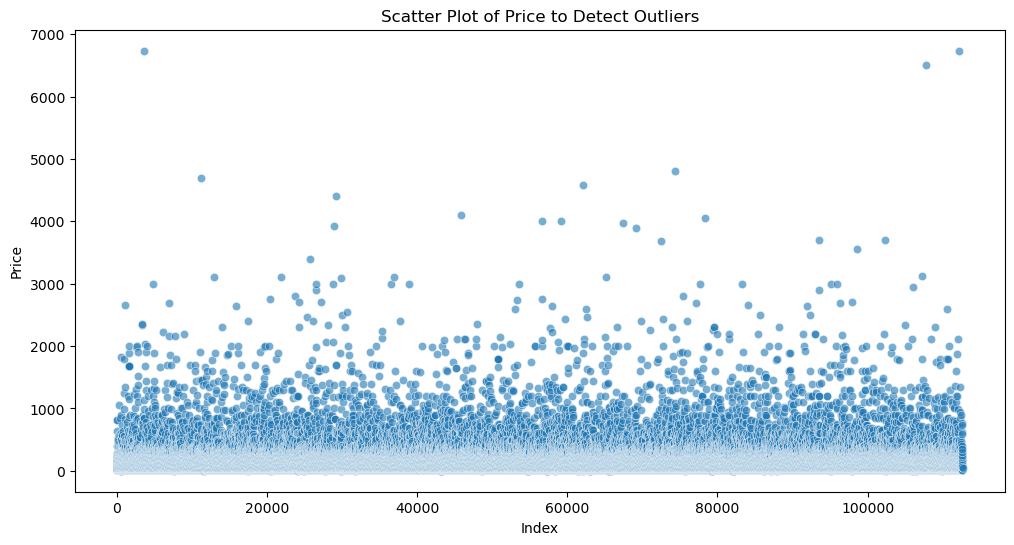

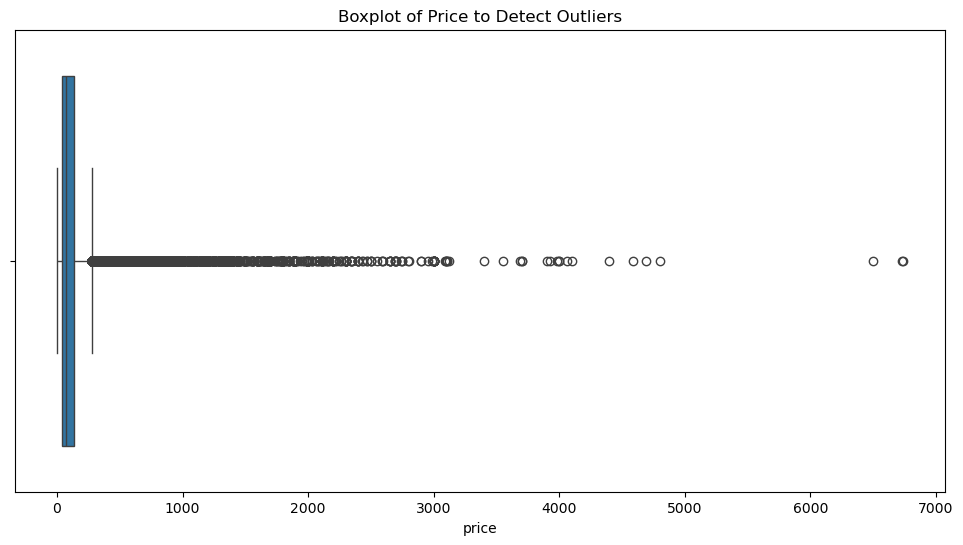

In [38]:
# Cek outliers untuk price

# Plot scatter plot untuk mengecek outlier
plt.figure(figsize=(12, 6))
sns.scatterplot(x=order_items_df.index, y=order_items_df["price"], alpha=0.6)
plt.title("Scatter Plot of Price to Detect Outliers")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

# Plot boxplot untuk visualisasi outlier tambahan
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["price"])
plt.title("Boxplot of Price to Detect Outliers")
plt.show()

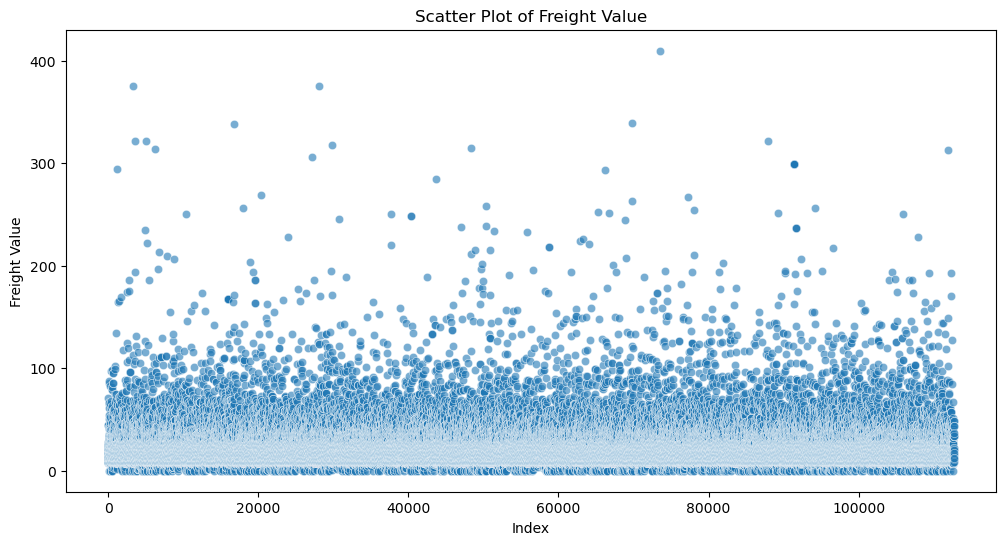

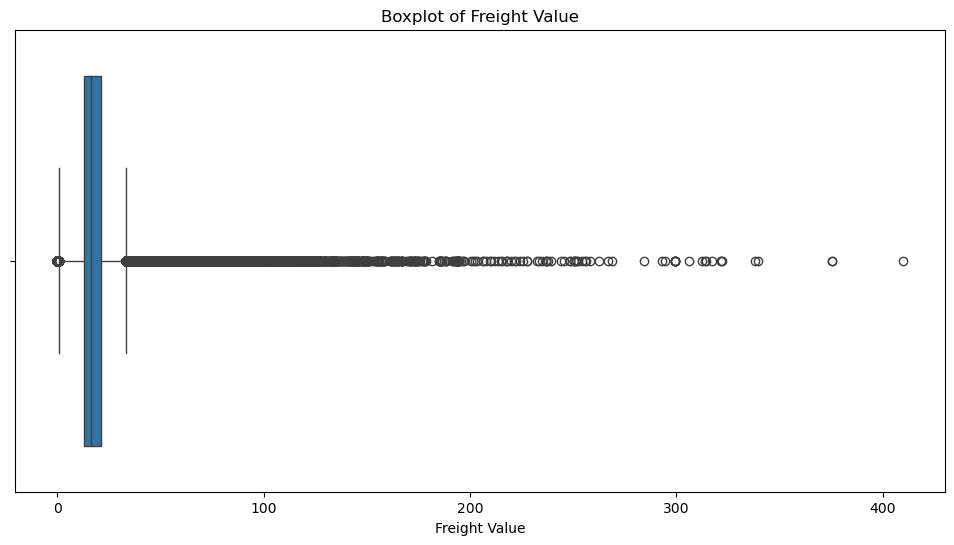

In [39]:
# Plot scatter plot untuk fitur 'freight_value'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=order_items_df.index, y=order_items_df["freight_value"], alpha=0.6)
plt.title("Scatter Plot of Freight Value")
plt.xlabel("Index")
plt.ylabel("Freight Value")
plt.show()

# Plot boxplot untuk fitur 'freight_value'
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["freight_value"])
plt.title("Boxplot of Freight Value")
plt.xlabel("Freight Value")
plt.show()

#### Assesing orders payments table

In [41]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [43]:
duplicate_value = order_payments_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [44]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


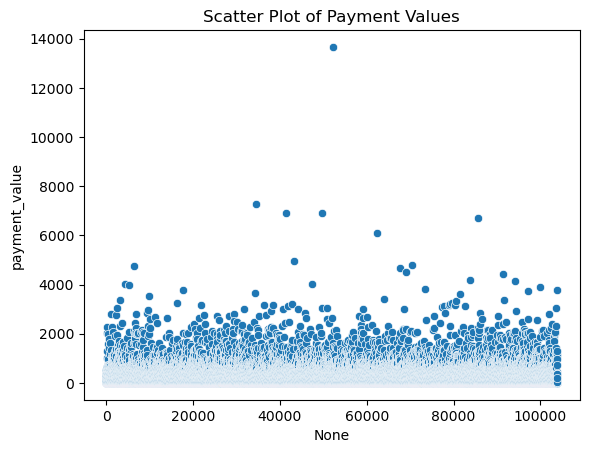

In [45]:
# Melihat outliers

sns.scatterplot(x=order_payments_df.index, y=order_payments_df["payment_value"])
plt.title("Scatter Plot of Payment Values")
plt.show()

#### Assesing orders reviews table

In [47]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [48]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [49]:
duplicate_value = order_reviews_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [50]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assesing products table

In [52]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [53]:
products_df.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [54]:
duplicate_value = products_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [55]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assesing products category table

In [57]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [58]:
product_category_name_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [59]:
duplicate_value = product_category_name_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [60]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Assesing sellers table

In [62]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [63]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [64]:
duplicate_value = sellers_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assesing geolocation table

In [66]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [67]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [68]:
duplicate_value = geolocation_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 261831


### Assessment Summary



1. **Customers Table**
   - **Invalid Data Type:** Terdapat satu tipe data yang tidak valid pada kolom `customer_zip_code_prefix`.
   - **Missing Values:** -
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

2. **Orders Table**
   - **Invalid Data Type:** Terdapat lima tipe data yang tidak valid yaitu `order_purchase_times`, `order_estimated_delivery_`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`.
   - **Missing Values:** Terdapat tiga kolom dengan nilai yang hilang: `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`.
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

3. **Order Items Table**
   - **Invalid Data Type:** Terdapat satu tipe data yang tidak valid pada kolom `order_item_id`.
   - **Missing Values:** -
   - **Duplicate Data:** Transformasikan `order_item_id` menjadi `quantity` untuk unit-per-order line.
   - **Inaccurate Values:** Terdapat outlier pada kolom `price` dan `freight_value`.

4. **Order Payments Table**
   - **Invalid Data Type:** -
   - **Missing Values:** -
   - **Duplicate Data:** -
   - **Inaccurate Values:** Terdapat outlier pada kolom `payment_value`.

5. **Order Reviews Table**
   - **Invalid Data Type:** Terdapat dua tipe data yang tidak valid pada kolom `review_creation_date` dan `review_answer_timestamp`.
   - **Missing Values:** Terdapat dua kolom dengan nilai yang hilang: `review_comment_title` dan `review_comment_message`.
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

6. **Products Table**
   - **Invalid Data Type:** Terdapat tujuh kolom yang perlu diubah: `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.
   - **Missing Values:** Terdapat delapan kolom dengan nilai yang hilang: `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

7. **Product Category Name Table**
   - **Invalid Data Type:** -
   - **Missing Values:** -
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

8. **Sellers Table**
   - **Invalid Data Type:** Terdapat satu tipe data yang tidak valid pada kolom `seller_zip_code_prefix`.
   - **Missing Values:** -
   - **Duplicate Data:** -
   - **Inaccurate Values:** -

9. **Geolocation Table**
   - **Invalid Data Type:** Terdapat satu tipe data yang tidak valid pada kolom `geolocation_zip_code_prefix`.
   - **Missing Values:** -
   - **Duplicate Data:** Total nilai duplikat: 261831.
   - **Inaccurate Values:** -
              |


### Cleaning Data

##### Customer Table

In [73]:
# Mengubah tipe data customer_zip_code_prefix menjadi String
customers_df["customer_zip_code_prefix"] = customers_df[
    "customer_zip_code_prefix"
].astype(str)

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


##### Orders Table

In [75]:
# Mengubah tipe data order_purchase_timestamp,order_approved_at,
# order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
# menjadi datetime

orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)

orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])

orders_df["order_delivered_carrier_date"] = pd.to_datetime(
    orders_df["order_delivered_carrier_date"]
)

orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)

orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)


In [76]:
# Hitung selisih waktu pengiriman, durasi pengiriman, dan durasi estimasi
orders_df["shipping_time"] = (
    orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_customer_date"]
)
orders_df["shipping_duration"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
)
orders_df["estimated_duration"] = (
    orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
)
orders_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,shipping_duration,estimated_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:28:40,15 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 05:00:36,26 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 20:58:23,12 days 02:41:21
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,18 days 14:05:55
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:38:58,23 days 11:01:02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:37:34,30 days 09:13:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 02:04:27,37 days 02:31:33


In [77]:
# Mengatasi missing value dengan metode ffill

orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].ffill()

print("Missing values: ", orders_df["order_delivered_customer_date"].isnull().sum())

Missing values:  0


##### Order Items Table

In [368]:
# Mengubah tipe data order_item_id menjadi String
order_items_df["order_item_id"] = order_items_df["order_item_id"].astype(str)
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


###### Mendapatkan informasi tentang jumlah unit (quantity) per baris pesanan (order line). Dalam konteks ini, kolom order_item_id digunakan untuk menghitung jumlah item dalam setiap pesanan, dan hasilnya digunakan untuk menganalisis profil pesanan secara lebih mendetail.

In [81]:
jumlah_df = (
    order_items_df.groupby(by=["product_id", "order_id"])
    .agg(
        {
            "order_item_id": "count",
            "seller_id": "first",
            "shipping_limit_date": "first",
            "price": "first",
            "freight_value": "first",
        }
    )
    .reset_index()
)

jumlah_df

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
102420,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
102421,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
102422,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51
102423,fffdb2d0ec8d6a61f0a0a0db3f25b441,dd38c566a34ff9deb93ff05d7bd6d0aa,1,9f505651f4a6abe901a56cdc21508025,2018-05-07 17:53:01,34.99,7.39


In [82]:
jumlah_df.rename(columns={"order_item_id": "quantity"}, inplace=True)
jumlah_df

,product_id,order_id,quantity,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
102420,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
102421,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
102422,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51
102423,fffdb2d0ec8d6a61f0a0a0db3f25b441,dd38c566a34ff9deb93ff05d7bd6d0aa,1,9f505651f4a6abe901a56cdc21508025,2018-05-07 17:53:01,34.99,7.39


Statistics before removing outliers:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


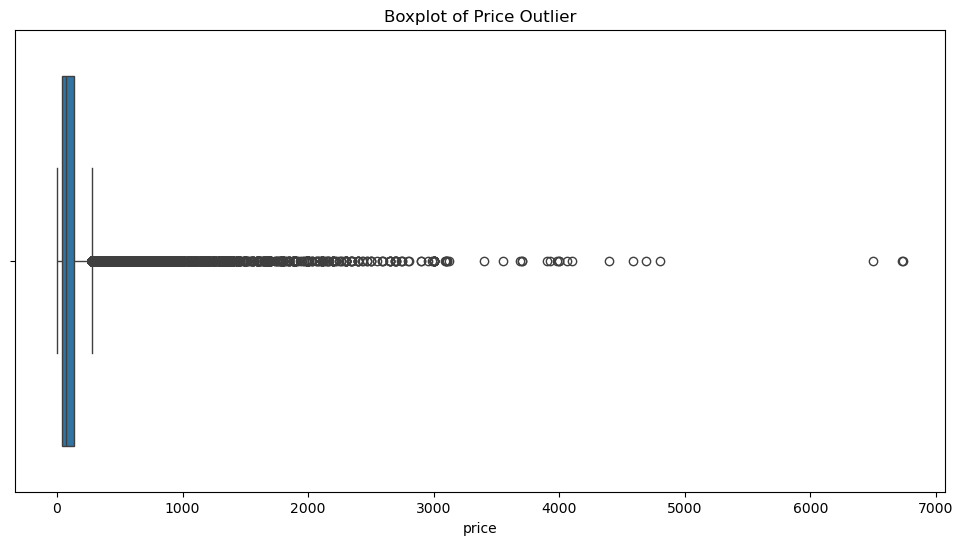


Statistics after removing outliers:
count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64


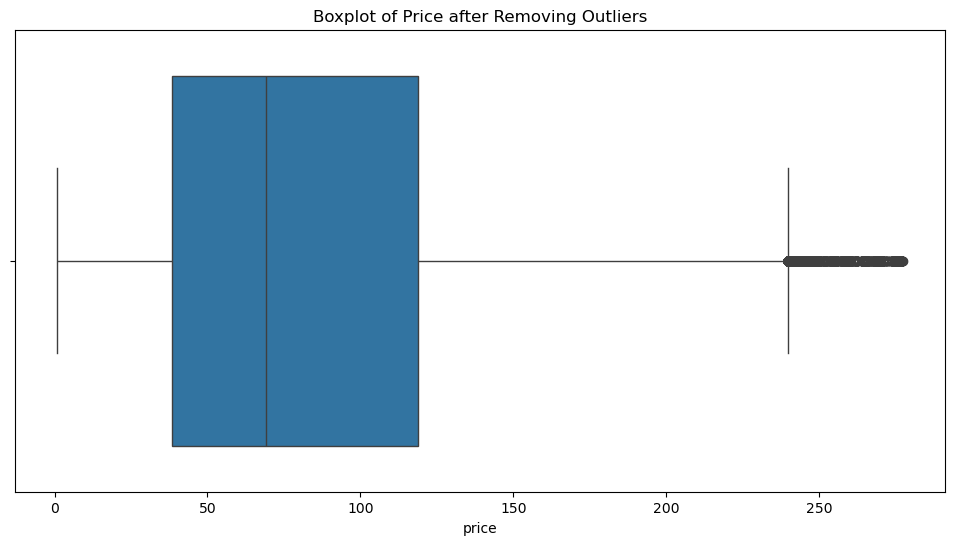

In [83]:
# HANDLING OUTLIERS PRICE

# Cek statistik sebelum menghapus outlier
print("Statistics before removing outliers:")
print(order_items_df["price"].describe())

# Plot boxplot untuk visualisasi outlier sebelum penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["price"])
plt.title("Boxplot of Price Outlier")
plt.show()

# Menghitung Q1, Q3, dan IQR
Q1 = order_items_df["price"].quantile(0.25)
Q3 = order_items_df["price"].quantile(0.75)
IQR = Q3 - Q1

# Menghapus baris dengan 'price' di luar rentang yang dapat diterima
filtered_df = order_items_df[(order_items_df["price"] >= (Q1 - 1.5 * IQR)) & (order_items_df["price"] <= (Q3 + 1.5 * IQR))]

# Cek statistik setelah menghapus outlier
print("\nStatistics after removing outliers:")
print(filtered_df["price"].describe())

# Plot boxplot untuk visualisasi outlier setelah penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df["price"])
plt.title("Boxplot of Price after Removing Outliers")
plt.show()

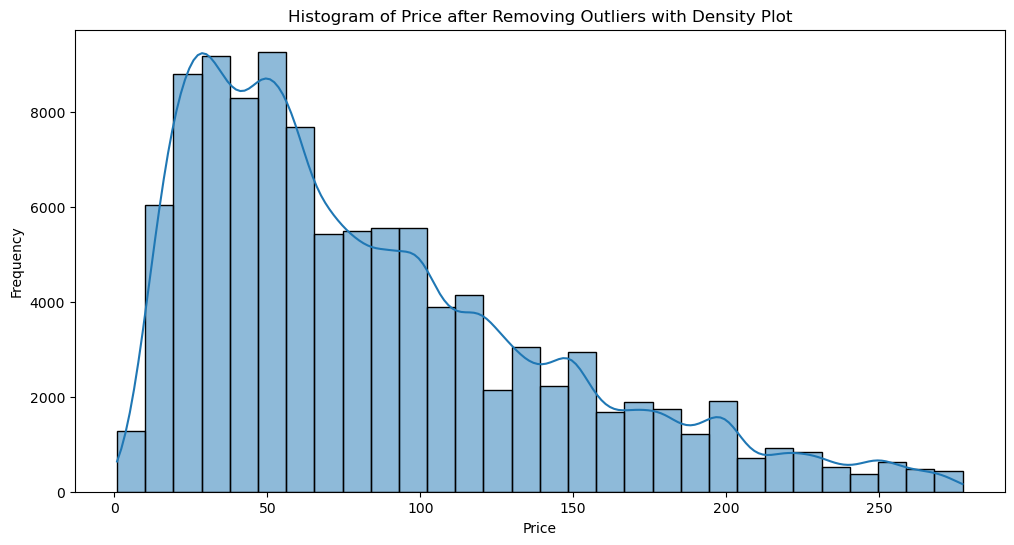

In [84]:
# DENSITY PLOT
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df["price"], bins=30, kde=True)
plt.title("Histogram of Price after Removing Outliers with Density Plot")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Statistics before removing outliers:
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


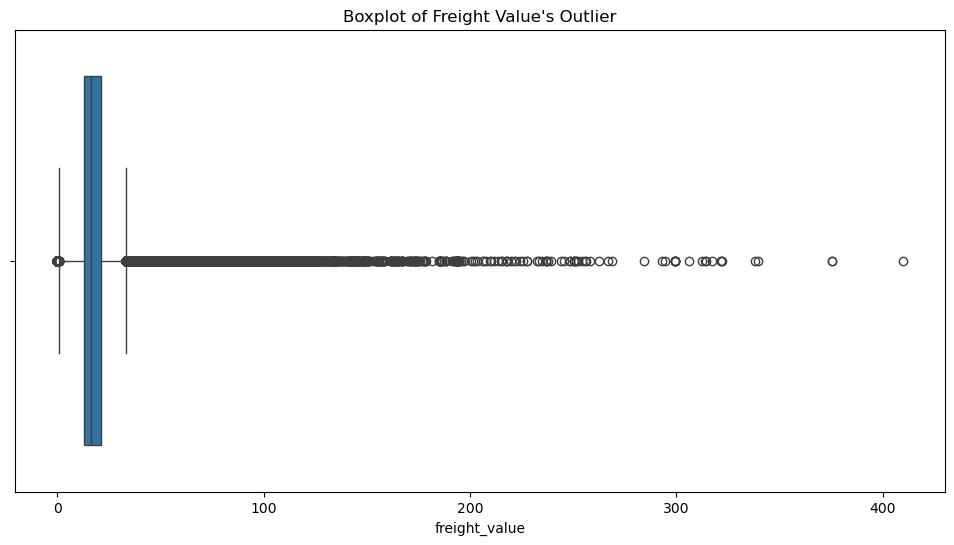


Statistics after removing outliers:
count    100516.000000
mean         16.125685
std           5.468564
min           0.980000
25%          12.760000
50%          15.620000
75%          18.800000
max          33.250000
Name: freight_value, dtype: float64


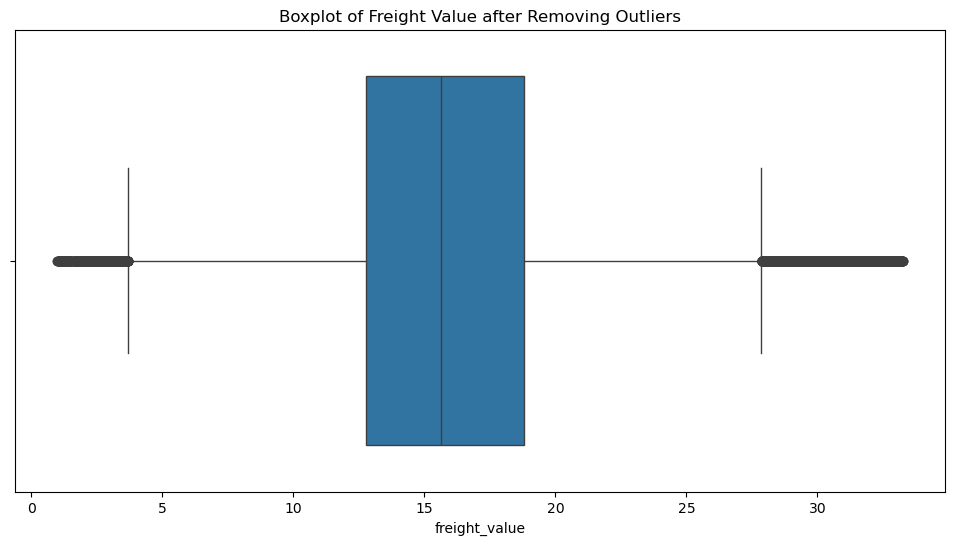

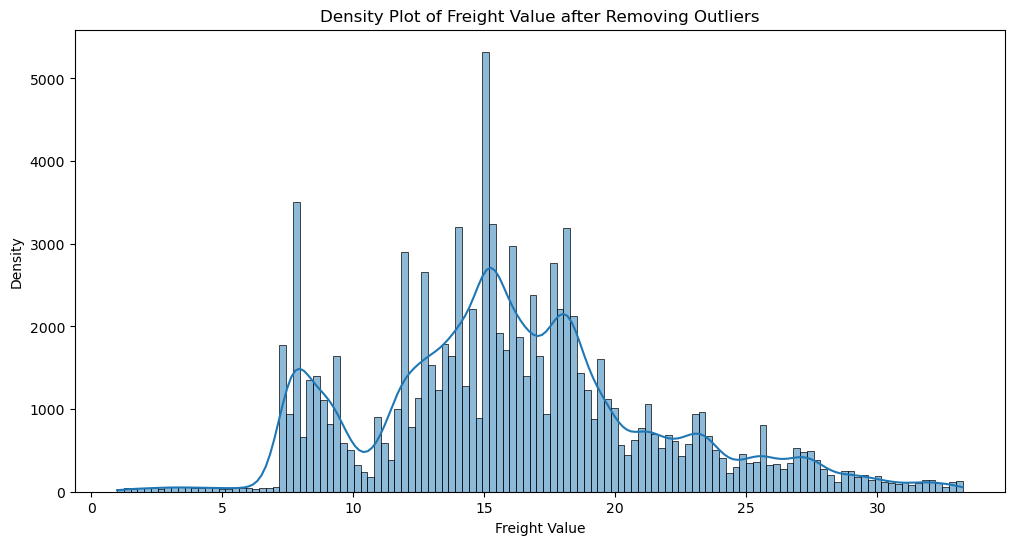

In [85]:
# HANDLING OUTLIERS FREIGHT VALUE

# Cek statistik sebelum menghapus outlier
print("Statistics before removing outliers:")
print(order_items_df["freight_value"].describe())

# Plot boxplot untuk visualisasi outlier sebelum penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["freight_value"])
plt.title("Boxplot of Freight Value's Outlier")
plt.show()

# Menghitung Q1, Q3, dan IQR
Q1 = order_items_df["freight_value"].quantile(0.25)
Q3 = order_items_df["freight_value"].quantile(0.75)
IQR = Q3 - Q1

# Menghapus baris dengan 'freight_value' di luar rentang yang dapat diterima
filtered_df = order_items_df[(order_items_df["freight_value"] >= (Q1 - 1.5 * IQR)) & (order_items_df["freight_value"] <= (Q3 + 1.5 * IQR))]

# Cek statistik setelah menghapus outlier
print("\nStatistics after removing outliers:")
print(filtered_df["freight_value"].describe())

# Plot boxplot untuk visualisasi outlier setelah penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df["freight_value"])
plt.title("Boxplot of Freight Value after Removing Outliers")
plt.show()

# Plot density plot untuk visualisasi distribusi setelah penghapusan outlier
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df["freight_value"], kde=True)
plt.title("Density Plot of Freight Value after Removing Outliers")
plt.xlabel("Freight Value")
plt.ylabel("Density")
plt.show()

In [370]:
# Menambahkan kolom 'year' dan 'month' berdasarkan 'shipping_limit_date'
order_items_df['year'] = order_items_df['shipping_limit_date'].dt.strftime('%Y')
order_items_df['month'] = order_items_df['shipping_limit_date'].dt.strftime('%m-%Y')
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,09-2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,05-2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,01-2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,08-2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,02-2017
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,2017,05-2017
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,2017,12-2017
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,2018,07-2018
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,2018,03-2018
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,2018,07-2018


##### Order Payments Table

Statistics before removing outliers:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


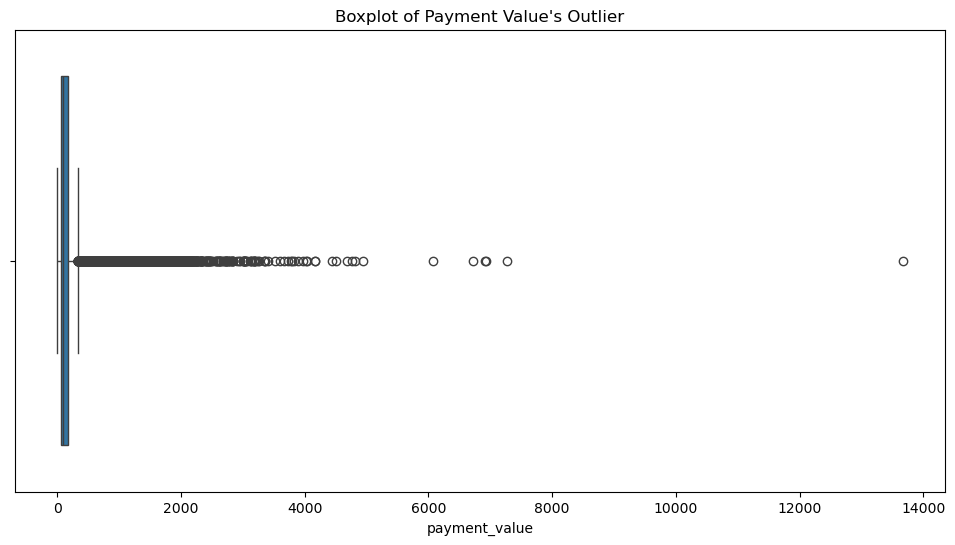


Statistics after removing outliers:
count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64


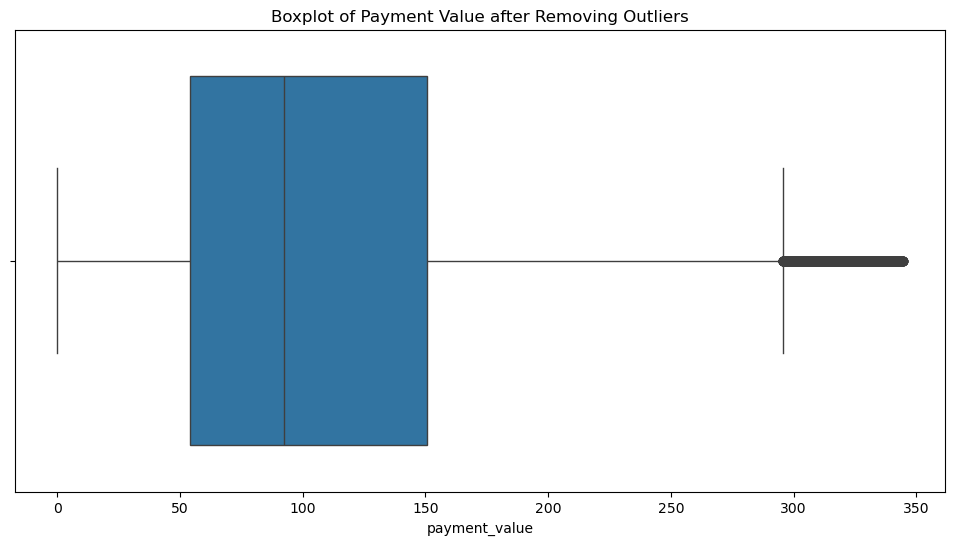

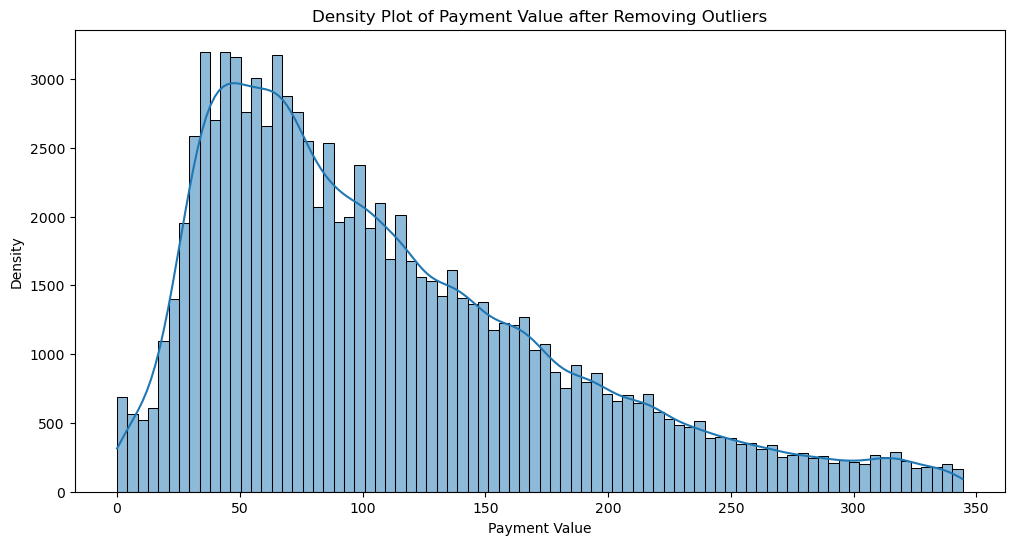

In [87]:
# HANDLING OUTLIERS
# Cek statistik sebelum menghapus outlier
print("Statistics before removing outliers:")
print(order_payments_df["payment_value"].describe())

# Plot boxplot untuk visualisasi outlier sebelum penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_payments_df["payment_value"])
plt.title("Boxplot of Payment Value's Outlier")
plt.show()

# Menghitung Q1, Q3, dan IQR
Q1 = order_payments_df["payment_value"].quantile(0.25)
Q3 = order_payments_df["payment_value"].quantile(0.75)
IQR = Q3 - Q1

# Menghapus baris dengan 'payment_value' di luar rentang yang dapat diterima
filtered_df = order_payments_df[
    (order_payments_df["payment_value"] >= (Q1 - 1.5 * IQR)) & 
    (order_payments_df["payment_value"] <= (Q3 + 1.5 * IQR))
]

# Cek statistik setelah menghapus outlier
print("\nStatistics after removing outliers:")
print(filtered_df["payment_value"].describe())

# Plot boxplot untuk visualisasi outlier setelah penghapusan
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df["payment_value"])
plt.title("Boxplot of Payment Value after Removing Outliers")
plt.show()

# Plot density plot untuk visualisasi distribusi setelah penghapusan outlier
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df["payment_value"], kde=True)
plt.title("Density Plot of Payment Value after Removing Outliers")
plt.xlabel("Payment Value")
plt.ylabel("Density")
plt.show()

##### Order Reviews Table

In [89]:
# Mengubah tipe data menjadi date time
order_reviews_df["review_creation_date"] = pd.to_datetime(
    order_reviews_df["review_creation_date"]
)

order_reviews_df["review_answer_timestamp"] = pd.to_datetime(
    order_reviews_df["review_answer_timestamp"]
)

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [90]:
# Handling missing value


order_reviews_cleaned_df = order_reviews_df.copy()

# Isi nilai yang hilang di kolom 'review_comment_title' dan 'review_comment_message' dengan "No comment"
order_reviews_cleaned_df.fillna({
    "review_comment_title": "No review",
    "review_comment_message": "No review"
}, inplace=True)

# Gabungkan data yang telah diperbaiki dengan DataFrame asli
order_reviews_df = pd.merge(order_reviews_df, order_reviews_cleaned_df, how="left", suffixes=('', '_cleaned'))

# Tampilkan beberapa baris pertama dari DataFrame yang telah diperbaiki
order_reviews_cleaned_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No review,No review,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No review,No review,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No review,No review,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No review,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No review,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


##### Products Table

In [92]:
# Mengubah penamaan atribut yang terdapat 'lenght' menjadi 'length'
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
products_df.rename(
    columns={"product_description_lenght": "product_description_length"}, inplace=True
)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_length            32341 non-null  float64
 3   product_description_length     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [93]:
products_df.isnull().sum().sort_values(ascending=False)

product_category_name_english    623
product_category_name            610
product_name_length              610
product_description_length       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_id                         0
dtype: int64

In [94]:
# Menemukan nilai null pada kolom 'product_category_name_english' ketika 'product_category_name' tidak null
missing_values_category = products_df.loc[products_df["product_category_name"].notnull() & products_df["product_category_name_english"].isnull()]

# Menampilkan kategori produk yang terkait dengan nilai null pada 'product_category_name_english'
unique_categories = set(missing_values_category["product_category_name"])
unique_categories

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

Untuk menangani nilai NaN pada kolom `product_category_name_english`, prosesnya adalah sebagai berikut: 

1. Terjemahkan data menggunakan informasi dari kolom `product_category_name`.
2. Isi nilai kosong di kolom `product_category_name_english` dengan hasil terjemahan.
3. Jika masih ada nilai yang kosong setelah terjemahan, tandai nilai tersebut sebagai 'not defined'.

In [96]:
# Mengisi nilai yang hilang (NaN) pada kolom product_category_name dan product_category_name_english dengan string 'not defined'
products_df['product_category_name'] = products_df['product_category_name'].fillna('not defined')
products_df['product_category_name_english'] = products_df['product_category_name_english'].fillna('not defined')

# Menerjemahkan data pada kolom 'product_category_name_english' berdasarkan kolom 'product_category_name'
products_df["product_category_name_english"] = np.where(
    products_df["product_category_name"] == 'pc_gamer', 
    'PC Gaming', 
    products_df["product_category_name_english"]
)
products_df["product_category_name_english"] = np.where(
    products_df["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 
    'portable kitchen food preparers', 
    products_df["product_category_name_english"]
)

# Mengecek missing value
products_df.isnull().sum().sort_values(ascending=False)

product_name_length              610
product_description_length       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_id                         0
product_category_name              0
product_category_name_english      0
dtype: int64

In [97]:
# Hitung nilai median
median_pnl = products_df["product_name_length"].median()
median_pdl = products_df["product_description_length"].median()
median_ppq = products_df["product_photos_qty"].median()
median_pw = products_df["product_weight_g"].median()
median_pl = products_df["product_length_cm"].median()
median_ph = products_df["product_height_cm"].median()
median_pw_width = products_df["product_width_cm"].median()

# Isi nilai yang hilang dengan nilai median yang telah dihitung
products_df["product_name_length"] = products_df["product_name_length"].fillna(median_pnl)
products_df["product_description_length"] = products_df["product_description_length"].fillna(median_pdl)
products_df["product_photos_qty"] = products_df["product_photos_qty"].fillna(median_ppq)
products_df["product_weight_g"] = products_df["product_weight_g"].fillna(median_pw)
products_df["product_length_cm"] = products_df["product_length_cm"].fillna(median_pl)
products_df["product_height_cm"] = products_df["product_height_cm"].fillna(median_ph)
products_df["product_width_cm"] = products_df["product_width_cm"].fillna(median_pw_width)

# Mengecek missing value
products_df.isnull().sum().sort_values(ascending=False)

product_id                       0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [98]:
# Mengubah data type

# Daftar kolom yang akan diubah tipenya menjadi int
columns_to_int = [
    "product_name_length",
    "product_description_length",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

# Ubah tipe data kolom menjadi int
products_df[columns_to_int] = products_df[columns_to_int].astype(int)
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32951 non-null  object
 2   product_name_length            32951 non-null  int32 
 3   product_description_length     32951 non-null  int32 
 4   product_photos_qty             32951 non-null  int32 
 5   product_weight_g               32951 non-null  int32 
 6   product_length_cm              32951 non-null  int32 
 7   product_height_cm              32951 non-null  int32 
 8   product_width_cm               32951 non-null  int32 
 9   product_category_name_english  32951 non-null  object
dtypes: int32(7), object(3)
memory usage: 1.6+ MB


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13,housewares


##### Sellers Table

In [100]:
# Mengubah tipe data
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


##### Geolocation Table

In [102]:
# Mengubah tipe data "geolocation_zip_code_prefix"
geolocation_df["geolocation_zip_code_prefix"] = geolocation_df[
    "geolocation_zip_code_prefix"
].astype(str)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [103]:
# Mengatasi duplicate data

# Hapus nilai duplikat berdasarkan kolom 'geolocation_zip_code_prefix'
geolocation_df = geolocation_df.drop_duplicates(subset="geolocation_zip_code_prefix", keep="first")

# Periksa jumlah nilai duplikat yang tersisa
total_duplicates = geolocation_df.duplicated().sum()
print(f"Total duplicate values: {total_duplicates}")


Total duplicate values: 0


In [104]:
# Mengecek nilai unik di kolom 'geolocation_city'
print(f"Unique values in 'geolocation_city':\n{geolocation_df['geolocation_city'].unique()}")

# Menghitung frekuensi setiap kombinasi kota dan kode pos
city_zip_freq = geolocation_df.groupby(
    by=["geolocation_city", "geolocation_zip_code_prefix"]
).agg({"geolocation_city": "count"})
print(f"Frequency of each city and zip code:\n{city_zip_freq}")

# Menghitung jumlah nilai unik untuk setiap kombinasi kota dan kode pos
city_zip_unique = geolocation_df.groupby(
    by=["geolocation_city", "geolocation_zip_code_prefix"]
).agg({"geolocation_city": "nunique"})
print(f"Unique count of cities for each zip code:\n{city_zip_unique}")

# Data homogenisasi: menyamakan nilai inkonsisten di kolom 'geolocation_city'
corrections = {
    "abadiania": "abadiânia",
    "abaete": "abaeté",
    "abare": "abaré",
    "abatia": "abatiá",
    "sao paulo": "são paulo",
    "cidade": "cidade gaúcha",
    "...arraial do cabo": "arraial do cabo",
    "4o. centenario": "quarto centenário",
    "4º centenario": "quarto centenário",
    "quarto centenario": "quarto centenário"
}

# Terapkan koreksi pada kolom 'geolocation_city'
geolocation_df["geolocation_city"] = geolocation_df["geolocation_city"].replace(corrections)

# Mengecek nilai unik setelah homogenisasi
print(f"Unique values in 'geolocation_city' after correction:\n{geolocation_df['geolocation_city'].unique()}")


Unique values in 'geolocation_city':
['sao paulo' 'são paulo' 'osasco' ... 'floriano peixoto' 'erebango'
 'santa cecilia do sul']
Frequency of each city and zip code:
                                                   geolocation_city
geolocation_city      geolocation_zip_code_prefix                  
abadia de goias       75345                                       1
abadia dos dourados   38540                                       1
abadiania             72940                                       1
abaete                35620                                       1
abaetetuba            68440                                       1
...                                                             ...
águas lindas de goiás 72927                                       1
álvaro de carvalho    17410                                       1
ângulo                86755                                       1
óbidos                68250                                       1
óleo             

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis

### Merging tabel `orders`, `order_items_consolidated`, dan  `products`

In [264]:
# Menggabungkan tabel orders dan order_items_consolidated
merged_sales_data = orders_df.merge(jumlah_df, on="order_id", how="inner")

# Menggabungkan tabel hasil gabungan sebelumnya dengan products
merged_sales_data = merged_sales_data.merge(products_df, on="product_id", how="inner")

# Menampilkan dataframe hasil gabungan
merged_sales_data


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,shipping_duration,...,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:28:40,...,8.72,utilidades_domesticas,40,268,4,500,19,8,13,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,13 days 18:46:08,...,22.76,perfumaria,29,178,1,400,19,13,19,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:27:40,...,19.22,automotivo,46,232,1,420,24,19,21,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 05:00:36,...,27.20,pet_shop,59,468,3,450,30,10,20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 20:58:23,...,8.72,papelaria,38,316,4,250,51,15,15,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,...,13.08,beleza_saude,50,1517,1,1175,22,13,18,health_beauty
102421,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:38:58,...,20.10,bebes,52,828,4,4950,40,10,40,baby
102422,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:37:34,...,65.02,eletrodomesticos_2,51,500,2,13300,32,90,22,home_appliances_2
102423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 02:04:27,...,40.59,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories


In [266]:
merged_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       102425 non-null  object         
 1   customer_id                    102425 non-null  object         
 2   order_status                   102425 non-null  object         
 3   order_purchase_timestamp       102425 non-null  datetime64[ns] 
 4   order_approved_at              102411 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   101397 non-null  datetime64[ns] 
 6   order_delivered_customer_date  102425 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  102425 non-null  datetime64[ns] 
 8   shipping_time                  100195 non-null  timedelta64[ns]
 9   shipping_duration              100195 non-null  timedelta64[ns]
 10  estimated_duration             102425 non-null  timedelt

### Explore Customer

In [201]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [203]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


**Asal Customer per kota**

In [233]:
top_customer = customers_df.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)
pd.DataFrame(top_customer)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


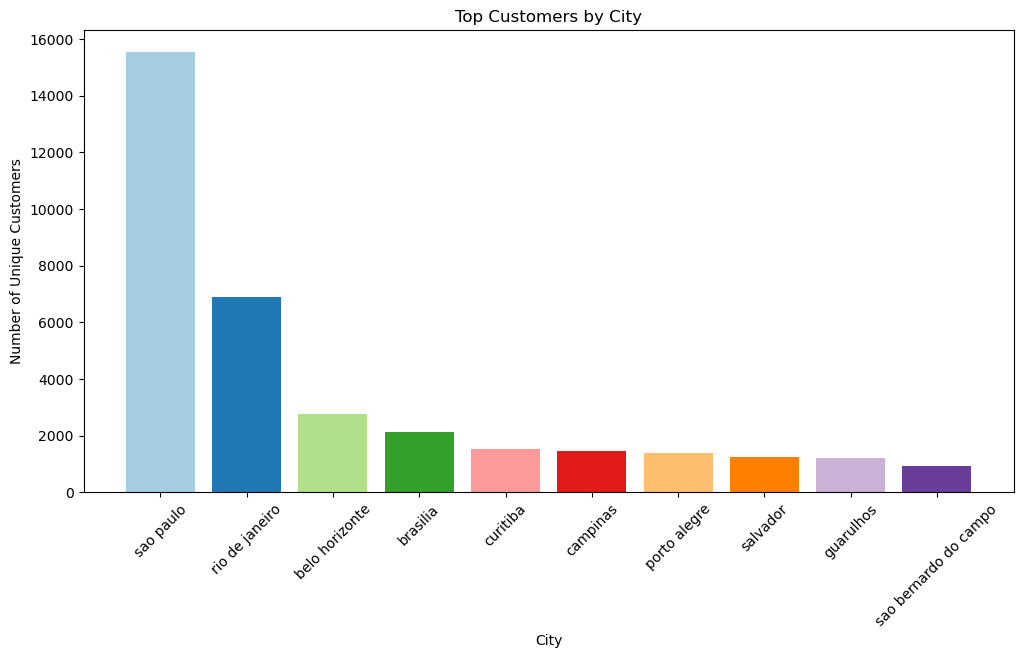

In [248]:
# Menghitung jumlah pelanggan unik per kota
top_customer = customers_df.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

# Membuat bar chart untuk pelanggan teratas berdasarkan kota
plt.figure(figsize=(12, 6))
plt.title("Top Customers by City")
plt.bar(top_customer.index[:10], top_customer.values[:10], color=plt.cm.Paired(range(10)))  # Menampilkan 10 kota teratas
plt.xlabel("City")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.show()

**Asal Customer per State**

In [245]:
customers_df.groupby("customer_state").agg(
    {"customer_unique_id": "nunique"}
).sort_values(by="customer_unique_id", ascending=False)

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964


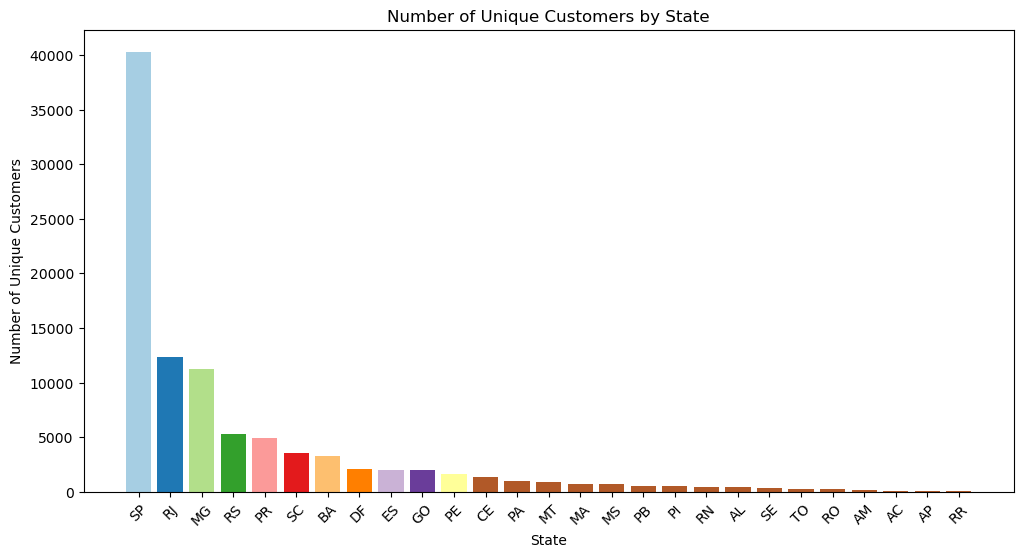

In [250]:
# Menghitung jumlah pelanggan unik per negara bagian
customer_counts_by_state = customers_df.groupby("customer_state").agg(
    {"customer_unique_id": "nunique"}
).sort_values(by="customer_unique_id", ascending=False)

# Membuat bar chart untuk distribusi pelanggan unik berdasarkan negara bagian
plt.figure(figsize=(12, 6))
plt.title("Number of Unique Customers by State")
plt.bar(customer_counts_by_state.index, customer_counts_by_state["customer_unique_id"], color=plt.cm.Paired(range(len(customer_counts_by_state))))
plt.xlabel("State")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.show()

### Explore Geolocation

In [211]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,são paulo,SP
1,1046,-23.546081,-46.644820,são paulo,SP
3,1041,-23.544392,-46.639499,são paulo,SP
4,1035,-23.541578,-46.641607,são paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


**Letak demografis terbanyak**

In [243]:
geolocation_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,são paulo,SP,3180
1,rio de janeiro,RJ,400
2,brasilia,DF,393
3,salvador,BA,275
4,belo horizonte,MG,204
...,...,...,...
6285,granjeiro,CE,1
6286,granja,CE,1
6287,granito,PE,1
6288,grandes rios,PR,1


### Explore Payment

**Jenis Payment Terbanyak**

In [235]:
# Check the most frequent payment type
order_payments_df.groupby(by=["payment_type"]).size().reset_index(
    name="counts"
).sort_values(ascending=False, by="counts")

,payment_type,counts
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


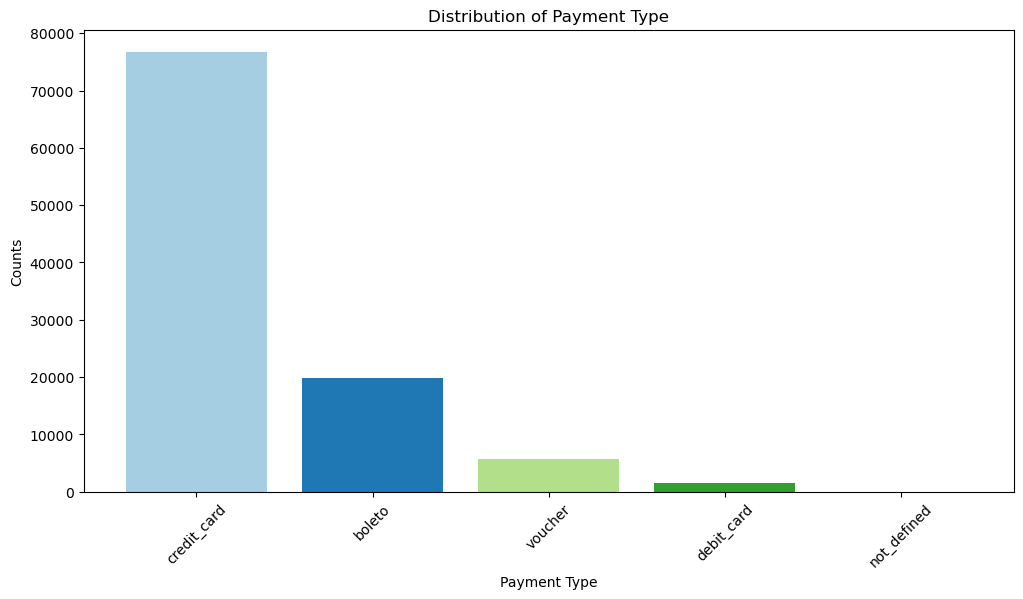

In [239]:
# Menghitung jumlah tipe pembayaran
payment_counts = order_payments_df['payment_type'].value_counts()

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.title("Distribution of Payment Type")
plt.bar(payment_counts.index, payment_counts.values, color=plt.cm.Paired(range(len(payment_counts))))
plt.xlabel("Payment Type")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

### Explore Review

**Rata-rata Skor Ulasan untuk Setiap Kategori Produk**

In [275]:
# Menggabungkan tabel sales dan order_reviews
merged_sales_data = merged_sales_data.merge(order_reviews_df, on="order_id", how="left")

# Memeriksa distribusi skor ulasan untuk setiap kategori produk
mean_review_scores = merged_sales_data.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False)
mean_review_scores


product_category_name_english
cds_dvds_musicals                  4.666667
fashion_childrens_clothes          4.500000
books_general_interest             4.446768
costruction_tools_tools            4.425532
food_drink                         4.412955
                                     ...   
fashion_male_clothing              3.639344
office_furniture                   3.602410
portable kitchen food preparers    3.428571
PC Gaming                          3.125000
security_and_services              2.500000
Name: review_score, Length: 74, dtype: float64

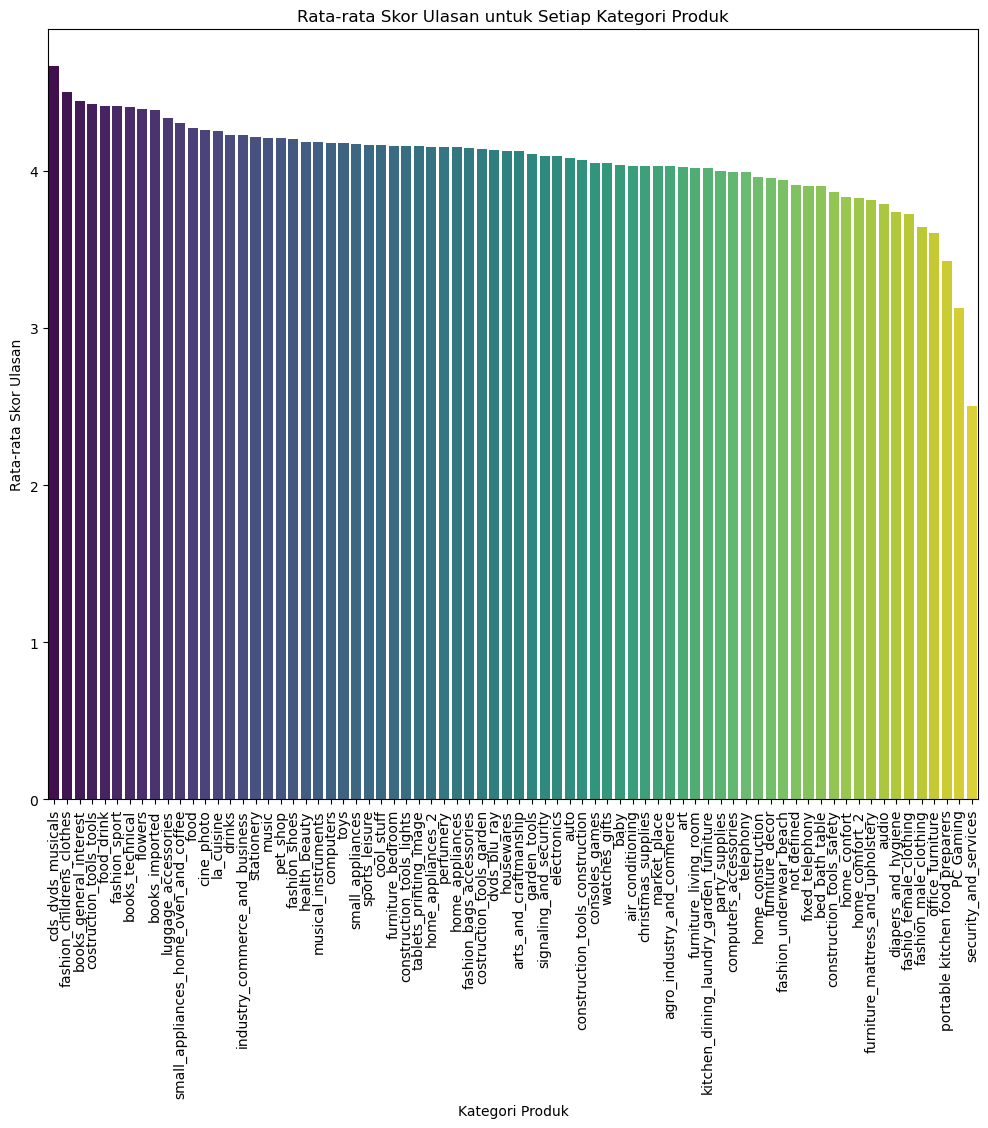

In [293]:
# Menghitung rata-rata skor ulasan untuk setiap kategori produk
mean_review_scores = merged_sales_data.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False)

# Mengubah menjadi DataFrame untuk memudahkan plotting
mean_review_scores_df = mean_review_scores.reset_index()

# Membuat diagram batang vertikal
plt.figure(figsize=(12, 10))
sns.barplot(x="product_category_name_english", y="review_score", data=mean_review_scores_df,hue="product_category_name_english", palette="viridis")
plt.title("Rata-rata Skor Ulasan untuk Setiap Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Skor Ulasan")
plt.xticks(rotation="vertical")
plt.show()

**Distribusi Skor Rating untuk Setiap Kategori Produk**

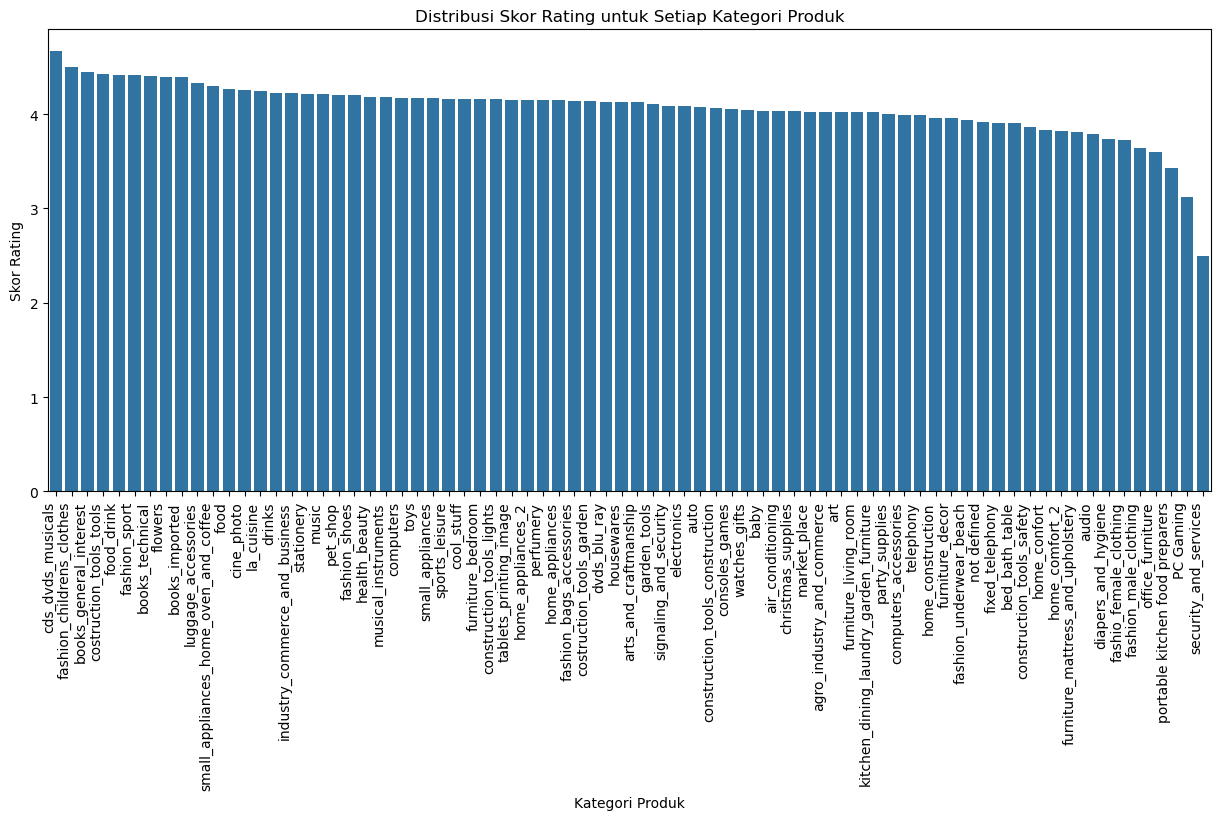

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

# Persiapkan data
data = (
    merged_sales_data.groupby("product_category_name_english")["review_score"]
    .mean()
    .reset_index()
)
data = data.sort_values(by="review_score", ascending=False)

# Visualisasikan distribusi skor rating kategori produk
plt.figure(figsize=(15, 6))
sns.barplot(
    x="product_category_name_english",
    y="review_score",
    data=data,
    errorbar=None,  # Menonaktifkan tampilan interval kepercayaan
)

# Tambahkan judul dan label sumbu
plt.title("Distribusi Skor Rating untuk Setiap Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Skor Rating")

# Miringkan label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=90, ha='right')  # Miringkan 90 derajat dengan perataan ke kanan

plt.show()


### Explore Order

**Cek status order berdasarkan status**

In [310]:
merged_sales_data.groupby(by=("order_status")).size().reset_index(name="counts").sort_values(
    by="counts", ascending=False)


,order_status,counts
2,delivered,104335
5,shipped,1204
1,canceled,493
3,invoiced,357
4,processing,313
6,unavailable,7
0,approved,2


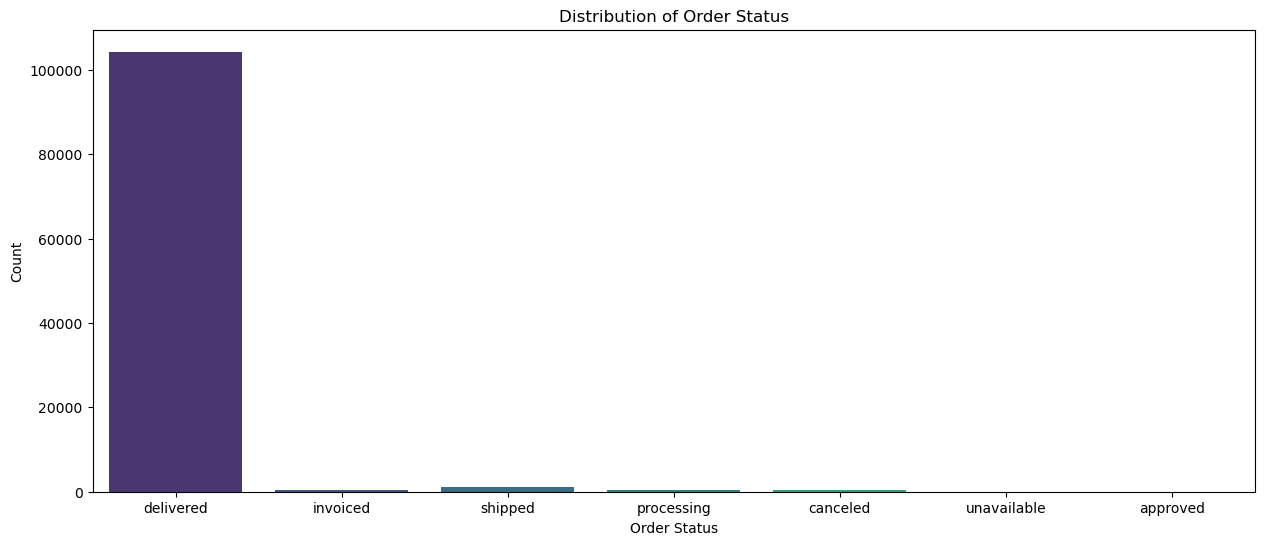

In [334]:

plt.figure(figsize=(15, 6))
plt.title("Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count")

ax = sns.countplot(
    x="order_status",
    data=merged_sales_data,
    hue="order_status",  # Add this line to avoid deprecation warning
    palette="viridis",  # Optional: choose a color palette
    legend=False  # Hide the legend if it is not needed
)

plt.show()

### Explore Seller

In [338]:
merged_sales_seller_df = merged_sales_data.merge(sellers_df, on="seller_id")
merged_sales_seller_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,shipping_duration,...,review_answer_timestamp_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:28:40,...,2017-10-12 03:43:48,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,13 days 18:46:08,...,2018-08-08 18:37:50,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:27:40,...,2018-08-22 19:07:58,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 05:00:36,...,2017-12-05 19:21:58,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 20:58:23,...,2018-02-18 13:02:51,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,8752,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106706,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,...,2017-03-23 11:02:08,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22,2017-03-23 11:02:08,12913,braganca paulista,SP
106707,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:38:58,...,2018-03-02 17:50:01,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,17602,tupa,SP
106708,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:37:34,...,2017-09-22 23:10:57,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,8290,sao paulo,SP
106709,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 02:04:27,...,2018-01-27 09:16:56,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,37175,ilicinea,MG


**Seller dengan penjualan tertinggi berdasarkan kota dan state**

In [345]:
# Kota
merged_sales_seller_df.groupby("seller_id").agg({"price": "sum"}).sort_values(
    by="price", ascending=False
)


,price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,227406.24
53243585a1d6dc2643021fd1853d8905,208199.61
4a3ca9315b744ce9f8e9374361493884,205924.22
fa1c13f2614d7b5c4749cbc52fecda94,194042.03
7e93a43ef30c4f03f38b393420bc753a,176147.91
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


In [347]:
# State
merged_sales_seller_df.groupby("seller_state").agg({"price": "sum"}).sort_values(
    by="price", ascending=False
)

,price
seller_state,
SP,8458511.81
PR,1227966.26
MG,964263.78
RJ,828948.63
SC,614152.26
RS,369933.55
BA,267220.07
DF,92815.49
PE,86371.78


### Explore Order Items

In [384]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month
count,112650,112650,112650,112650,112650,112650.000000,112650.000000,112650,112650
unique,98666,21,32951,3095,NaN,NaN,NaN,4,26
top,8272b63d03f5f79c56e9e4120aec44ef,1,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,2018,08-2018
freq,21,98666,527,2033,NaN,NaN,NaN,62511,8815
mean,NaN,NaN,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN
min,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN
max,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN


In [374]:
# Mengelompokkan berdasarkan tahun dan menghitung jumlah pesanan unik
orders_per_year = order_items_df.groupby(by="year")["order_id"].nunique()

# Menampilkan distribusi jumlah pesanan unik pada setiap tahun
orders_per_year

year
2016      312
2017    43580
2018    54771
2020        3
Name: order_id, dtype: int64

In [382]:
# Mengelompokkan berdasarkan bulan dan menghitung jumlah pesanan unik
orders_per_month = order_items_df.groupby(by="month")["order_id"].nunique()

# Menampilkan distribusi jumlah pesanan unik pada setiap bulan
orders_per_month

month
01-2017     573
01-2018    6656
02-2017    1650
02-2018    6450
02-2020       2
03-2017    2401
03-2018    7636
04-2017    2111
04-2018    6656
04-2020       1
05-2017    3674
05-2018    7572
06-2017    3385
06-2018    6019
07-2017    3643
07-2018    5922
08-2017    4403
08-2018    7823
09-2016       2
09-2017    4165
09-2018      82
10-2016     309
10-2017    4490
11-2017    6314
12-2016       1
12-2017    6772
Name: order_id, dtype: int64

### Merge All DATAFRAME

In [394]:
# Merge the sales_df and customers_df
all_df = merged_sales_data.merge(customers_df, on="customer_id", how="left")

# Check the summary of the dataset and its columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106711 entries, 0 to 106710
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       106711 non-null  object         
 1   customer_id                    106711 non-null  object         
 2   order_status                   106711 non-null  object         
 3   order_purchase_timestamp       106711 non-null  datetime64[ns] 
 4   order_approved_at              106697 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   105620 non-null  datetime64[ns] 
 6   order_delivered_customer_date  106711 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  106711 non-null  datetime64[ns] 
 8   shipping_time                  104334 non-null  timedelta64[ns]
 9   shipping_duration              104334 non-null  timedelta64[ns]
 10  estimated_duration             106711 non-null  timedelt

In [555]:
# Menambahkan kolom total price
all_df["total_price"] = all_df["quantity"] * all_df["price"]
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,shipping_duration,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:28:40,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,13 days 18:46:08,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:27:40,...,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 05:00:36,...,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 20:58:23,...,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106706,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,...,5.0,NaN,NaN,2017-03-22,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,72.00
106707,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:38:58,...,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,174.90
106708,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:37:34,...,5.0,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,205.99
106709,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 02:04:27,...,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,359.98


## Visualization & Explanatory Analysis

### Pertanyaan 1: Jenis Pembayaran apa yang paling sering digunakan?

In [398]:
# Hitung rata-rata nilai pembayaran untuk setiap jenis pembayaran
avg_payment_value_by_type = order_payments_df.groupby("payment_type")["payment_value"].mean().reset_index()
avg_payment_value_by_type.columns = ["Payment Type", "Average Payment Value"]

# Hitung frekuensi penggunaan tiap jenis pembayaran
payment_count_by_type = order_payments_df.groupby("payment_type")["order_id"].count().reset_index()
payment_count_by_type.columns = ["Payment Type", "Transaction Count"]

# Tampilkan DataFrame dengan rata-rata nilai pembayaran
avg_payment_value_by_type


,Payment Type,Average Payment Value
0,boleto,145.034435
1,credit_card,163.319021
2,debit_card,142.570170
3,not_defined,0.000000
4,voucher,65.703354


In [420]:
payment_count_by_type

,Payment Type,Transaction Count
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


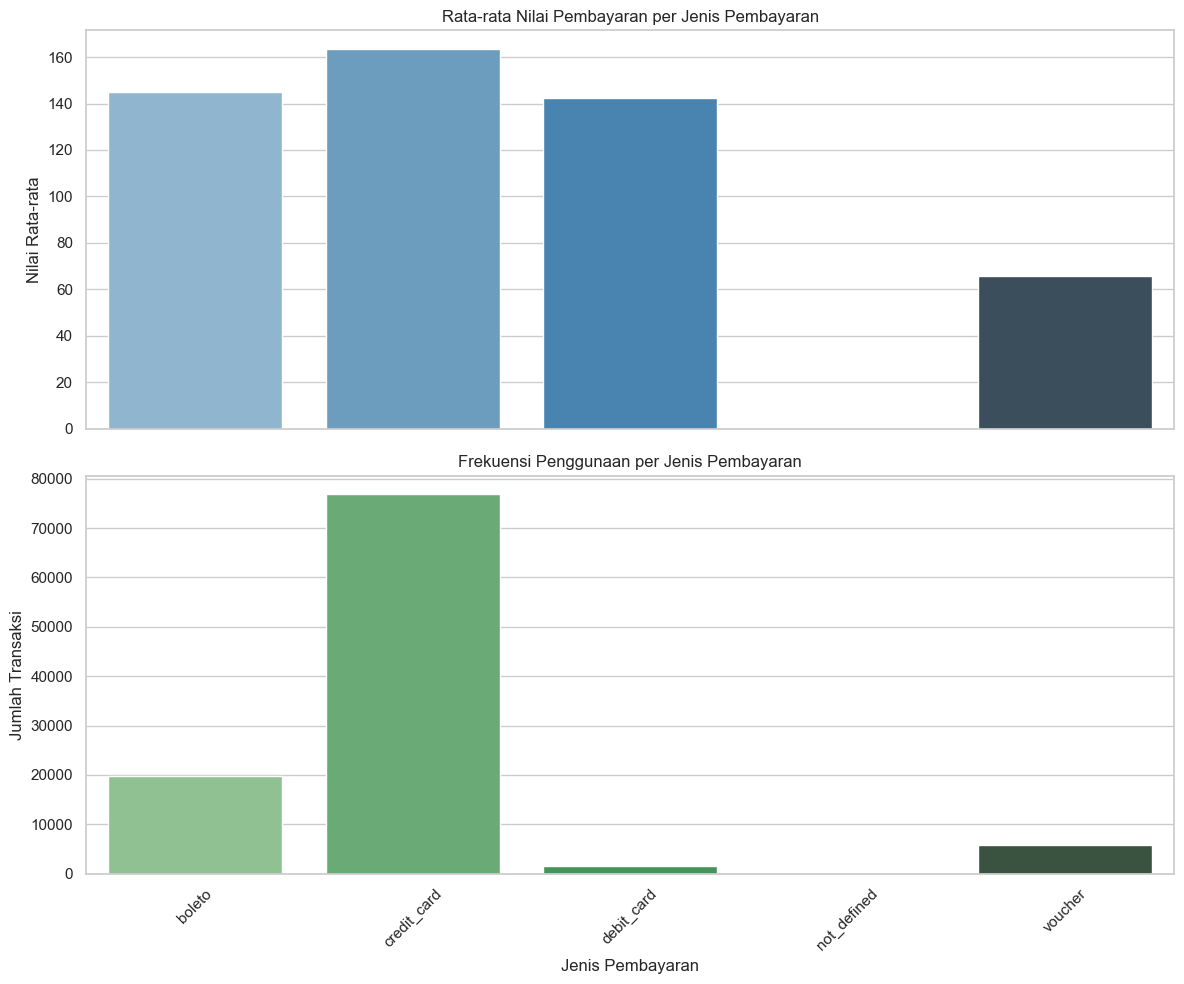

In [418]:

# DataFrame dengan rata-rata nilai pembayaran
avg_payment_value_by_type = order_payments_df.groupby("payment_type")["payment_value"].mean().reset_index()
avg_payment_value_by_type.columns = ["Payment Type", "Average Payment Value"]

# DataFrame dengan frekuensi penggunaan
payment_count_by_type = order_payments_df.groupby("payment_type")["order_id"].count().reset_index()
payment_count_by_type.columns = ["Payment Type", "Transaction Count"]

# Buat subplots untuk dua diagram batang
fig, ax1 = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Diagram batang untuk rata-rata nilai pembayaran
sns.barplot(data=avg_payment_value_by_type, x="Payment Type", y="Average Payment Value", hue="Payment Type", palette="Blues_d", ax=ax1[0], legend=False)
ax1[0].set_title('Rata-rata Nilai Pembayaran per Jenis Pembayaran')
ax1[0].set_ylabel('Nilai Rata-rata')

# Diagram batang untuk frekuensi penggunaan
sns.barplot(data=payment_count_by_type, x="Payment Type", y="Transaction Count", hue="Payment Type", palette="Greens_d", ax=ax1[1], legend=False)
ax1[1].set_title('Frekuensi Penggunaan per Jenis Pembayaran')
ax1[1].set_xlabel('Jenis Pembayaran')
ax1[1].set_ylabel('Jumlah Transaksi')

# Tampilkan plot
plt.xticks(rotation=45) # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()


**Dari data yang diberikan, kita dapat menarik beberapa kesimpulan tentang jenis pembayaran yang digunakan dan nilai rata-rata pembayaran:**

1. **Nilai Rata-Rata Pembayaran**:
   - **`credit_card`** memiliki nilai rata-rata pembayaran tertinggi sebesar **163.32**. Ini menunjukkan bahwa pelanggan yang menggunakan kartu kredit cenderung membayar lebih banyak per transaksi dibandingkan dengan metode pembayaran lainnya.
   - **`boleto`** dan **`debit_card`** memiliki nilai rata-rata pembayaran yang relatif dekat, masing-masing **145.03** dan **142.57**. Ini menunjukkan bahwa nilai rata-rata pembayaran untuk kedua metode ini hampir sama.
   - **`voucher`** memiliki nilai rata-rata pembayaran terendah yaitu **65.70**, menunjukkan bahwa transaksi dengan voucher biasanya lebih kecil dibandingkan dengan metode pembayaran lainnya.
   - **`not_defined`** memiliki nilai rata-rata pembayaran sebesar **0.00**, yang mungkin menunjukkan adanya data yang tidak lengkap atau transaksi yang tidak didefinisikan dengan jelas.

2. **Frekuensi Penggunaan**:
   - **`credit_card`** adalah metode pembayaran yang paling sering digunakan dengan **76,795** transaksi. Ini menunjukkan bahwa kartu kredit adalah pilihan utama pelanggan.
   - **`boleto`** adalah metode pembayaran kedua yang paling populer dengan **19,784** transaksi. Meskipun sering digunakan, nilai rata-rata pembayarannya lebih rendah dibandingkan kartu kredit.
   - **`voucher`** dan **`debit_card`** memiliki frekuensi penggunaan yang jauh lebih rendah, masing-masing **5,775** dan **1,529** transaksi. Ini menunjukkan bahwa kedua metode ini tidak sepopuler kartu kredit atau boleto.
   - **`not_defined`** memiliki jumlah transaksi yang sangat rendah (**3**), yang menunjukkan bahwa data ini hampir tidak berpengaruh.


### Pertanyaan 2: Kapan terjadi penjualan yang paling banyak?

In [429]:
# Mengelompokkan data berdasarkan bulan dan tahun serta menghitung jumlah order_id yang unik
sales = order_items_df.groupby(by=["month", "year"])["order_id"].nunique().reset_index()

# Mengonversi kolom "month" ke format tanggal menggunakan pd.to_datetime
sales["month"] = pd.to_datetime(sales["month"], format='%m-%Y')

# Menampilkan DataFrame yang telah dimodifikasi
sales

,month,year,order_id
0,2017-01-01,2017,573
1,2018-01-01,2018,6656
2,2017-02-01,2017,1650
3,2018-02-01,2018,6450
4,2020-02-01,2020,2
5,2017-03-01,2017,2401
6,2018-03-01,2018,7636
7,2017-04-01,2017,2111
8,2018-04-01,2018,6656
9,2020-04-01,2020,1


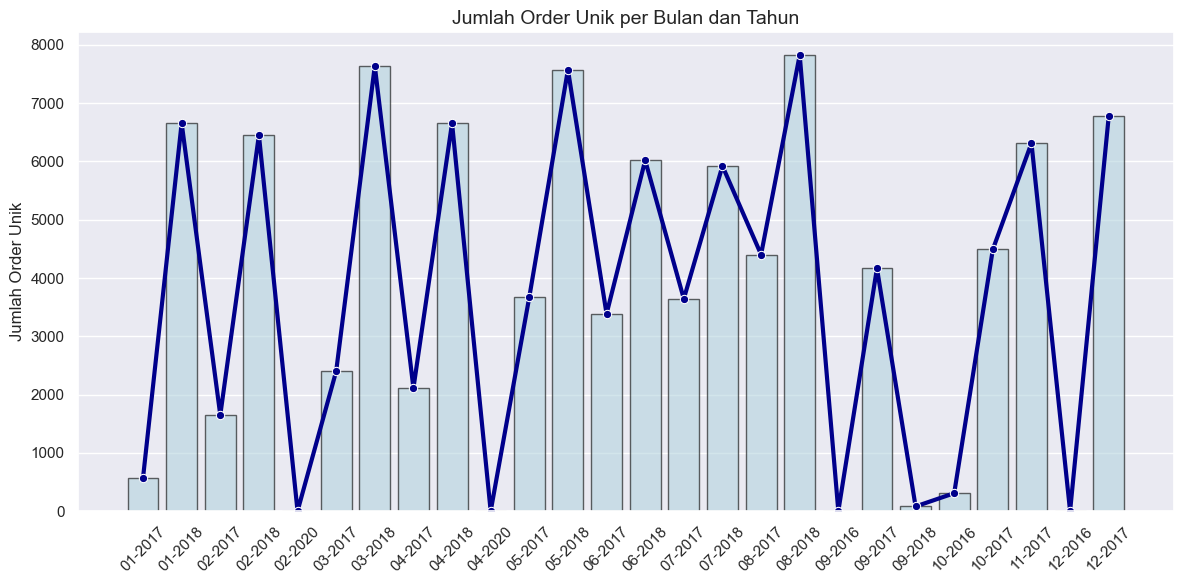

In [443]:
# Mengatur tema visual Seaborn
sns.set_theme(style="darkgrid")

# Membuat gambar
plt.figure(figsize=(12, 6))

# Diagram batang
sns.barplot(x='month', y='order_id', data=sales, color='lightblue', edgecolor='black', alpha=0.6)

# Diagram garis di atas batang
sns.lineplot(x='month', y='order_id', data=sales, color='darkblue', marker='o', linewidth=3)

# Atur judul dan label sumbu
plt.title("Jumlah Order Unik per Bulan dan Tahun", loc="center", fontsize=14)
plt.ylabel("Jumlah Order Unik")
plt.xlabel(None)

# Rotasi label bulan agar lebih mudah dibaca
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan tata letak
plt.show()

**Penjelasan yang dapat diambil sesuai dengan data yang ditampilkan**

1. **Penjualan Tertinggi**:
   - Penjualan tertinggi terjadi pada bulan Agustus 2018, dengan jumlah order `7823`. Ini menunjukkan bahwa bulan tersebut adalah periode dengan aktivitas penjualan yang sangat tinggi dibandingkan bulan-bulan lainnya.

2. **Tren Musiman**:
   - Secara umum, ada pola musiman dengan penjualan yang tinggi pada tahun 2018 dibandingkan dengan tahun lainnya, terutama pada bulan-bulan tertentu seperti Maret, Mei, dan Agustus. Ini bisa menunjukkan bahwa tahun 2018 adalah tahun yang sangat baik dalam hal penjualan.

3. **Perbandingan Tahun**:
   - Tahun 2018 secara konsisten menunjukkan angka penjualan yang lebih tinggi dibandingkan tahun-tahun lain, khususnya dibandingkan dengan tahun 2017. Ini bisa menunjukkan pertumbuhan atau peningkatan dalam penjualan pada tahun 2018.

4. **Penjualan Rendah**:
   - Beberapa bulan pada tahun 2020 menunjukkan penjualan yang sangat rendah (misalnya, Februari 2020 dan April 2020). Ini mungkin bisa dikaitkan dengan faktor-faktor eksternal seperti dampak pandemi COVID-19 atau perubahan besar dalam bisnis.

5. **Data Tidak Konsisten**:
   - Ada data untuk tahun-tahun yang tidak berurutan (misalnya, 2016) yang menunjukkan penjualan sangat rendah, menunjukkan bahwa data dari tahun-tahun tersebut mungkin tidak sekomprehensif tahun-tahun lain atau memiliki masalah dalam pencatatan.

6. **Penjualan Bulanan**:
   - Penjualan bulanan memiliki variasi yang signifikan, dengan beberapa bulan menunjukkan lonjakan penjualan yang besar. Ini menunjukkan adanya kemungkinan fluktuasi musiman atau promosi khusus yang mempengaruhi penjualan.

Secara keseluruhan, data menunjukkan bahwa 2018 adalah tahun yang sangat produktif dalam hal penjualan, dengan Agustus menjadi bulan puncaknya. Sementara itu, ada periode lain dengan penjualan rendah yang mungkin perlu diperiksa lebih lanjut untuk memahami faktor-faktor yang mempengaruhinya.

### Pertanyaan 3: Produk apa yang paling banyak terjual?

In [451]:
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
8,bed_bath_table,11105
44,health_beauty,9426
68,sports_leisure,8286
16,computers_accessories,7286
40,furniture_decor,7222
...,...,...
53,la_cuisine,13
12,cds_dvds_musicals,12
30,fashion_childrens_clothes,8
0,PC Gaming,8


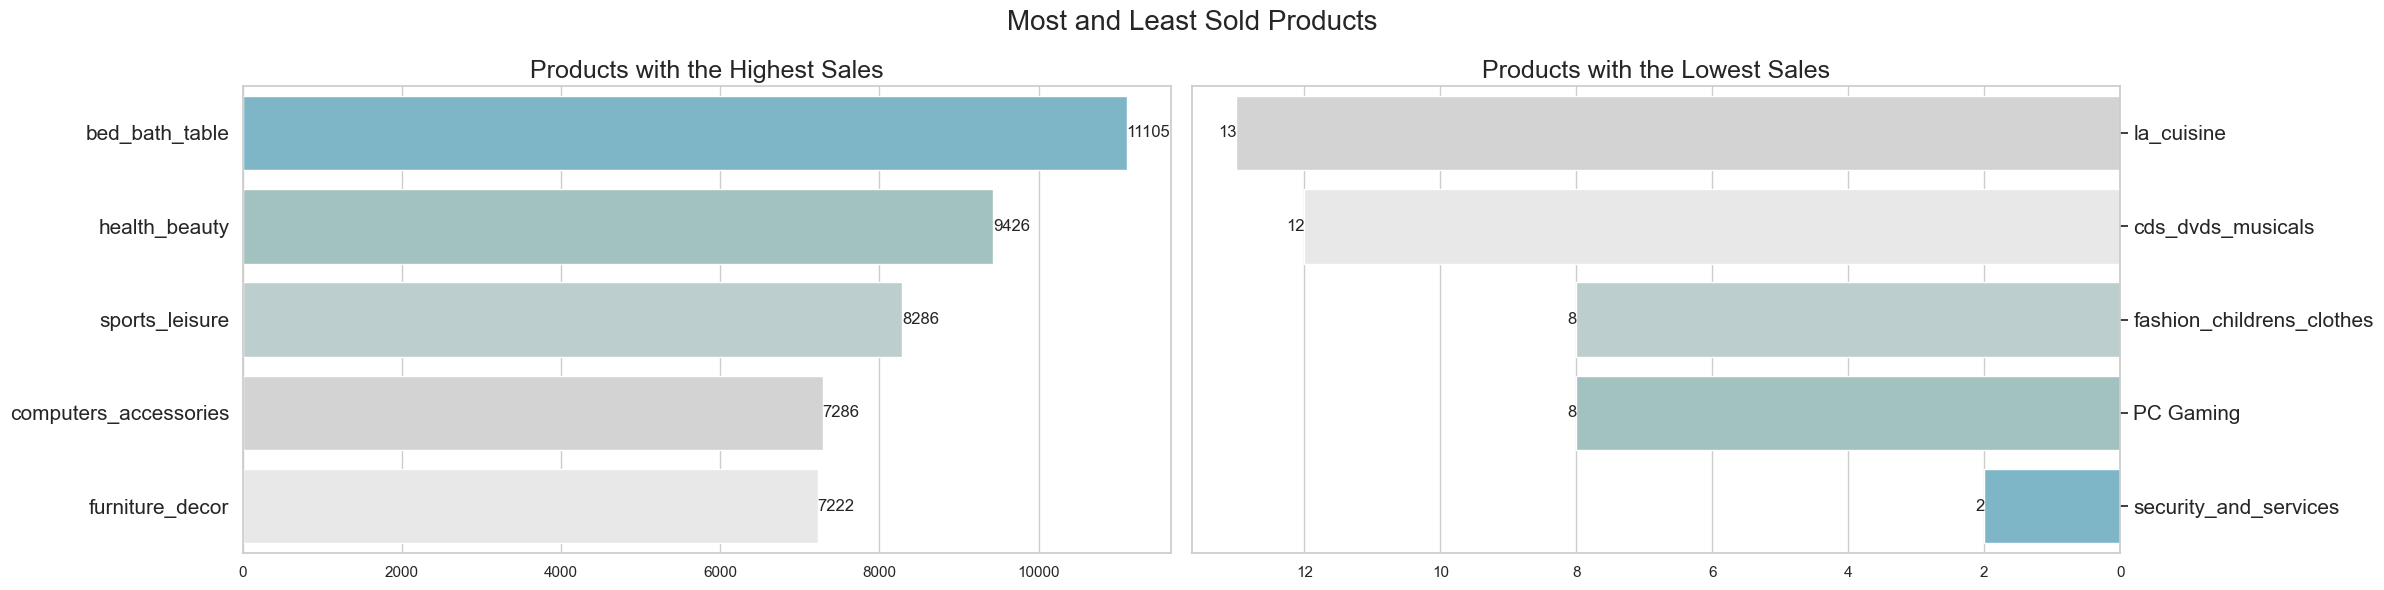

In [459]:
# Mengatur tema visual Seaborn
sns.set_theme(style="whitegrid")

# Warna untuk diagram
colors_top = ["#72BCD4", "#9CC7C4", "#BAD1D1", "#D3D3D3", "#E8E8E8"]
colors_bottom = ["#D3D3D3", "#E8E8E8", "#BAD1D1", "#9CC7C4", "#72BCD4"]

# Membagi data menjadi produk teratas dan terbawah
top_products = sorted_df.head(5)
bottom_products = sorted_df.tail(5).sort_values(by="product_id", ascending=False)

# Membuat plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Produk dengan penjualan tertinggi
sns.barplot(x="product_id", y="product_category_name_english", data=top_products, hue="product_category_name_english", palette=colors_top, ax=ax[0], dodge=False, legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Products with the Highest Sales", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f', fontsize=12)

# Produk dengan penjualan terendah
sns.barplot(x="product_id", y="product_category_name_english", data=bottom_products, hue="product_category_name_english", palette=colors_bottom, ax=ax[1], dodge=False, legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Products with the Lowest Sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f', fontsize=12)

# Menampilkan judul umum
plt.suptitle("Most and Least Sold Products", fontsize=20)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Penjelasan dari hasil data yang telah ada**

1. **Kategori dengan Produk Terbanyak**:
   - **Bed_Bath_Table**: Kategori ini memiliki jumlah produk terbanyak dengan `product_id` sebesar 11105.
   - **Health_Beauty**: Kategori ini juga sangat populer dengan `product_id` sebesar 9426.
   - **Sports_Leisure**: Kategori ini memiliki jumlah produk yang signifikan dengan `product_id` sebesar 8286.
   - **Computers_Accessories**: Kategori ini memiliki jumlah produk yang tinggi dengan `product_id` sebesar 7286.
   - **Furniture_Decor**: Kategori ini memiliki jumlah produk yang besar dengan `product_id` sebesar 7222.

2. **Kategori dengan Produk Terkecil**:
   - **Security and Services**: Kategori ini memiliki jumlah produk paling sedikit dengan `product_id` sebesar 2.
   - **PC Gaming** dan **Fashion Children's Clothes**: Kedua kategori ini juga memiliki jumlah produk yang sangat sedikit dengan `product_id` sebesar 8.
   - **CDs, DVDs, Musicals**: Kategori ini memiliki jumlah produk yang sangat rendah dengan `product_id` sebesar 12.
   - **La Cuisine**: Kategori ini juga memiliki jumlah produk yang sangat sedikit dengan `product_id` sebesar 13.

3. **Distribusi Produk**:
   - Kategori produk yang berhubungan dengan rumah dan kesehatan (seperti `bed_bath_table` dan `health_beauty`) cenderung memiliki jumlah produk yang lebih banyak.
   - Kategori yang lebih spesifik atau niche (seperti `security_and_services` dan `PC Gaming`) memiliki jumlah produk yang lebih sedikit.

4. **Analisis Kategori Produk**:
   - Kategori dengan jumlah produk yang banyak kemungkinan besar mencerminkan popularitas atau permintaan yang tinggi dalam kategori tersebut.
   - Kategori dengan jumlah produk yang sedikit mungkin mencerminkan niche market atau kategori produk yang sangat spesifik yang tidak memiliki permintaan yang besar.


### Pertanyaan 4: Produk apa yang memiliki performance yang baik berdasarkan rating reviews?

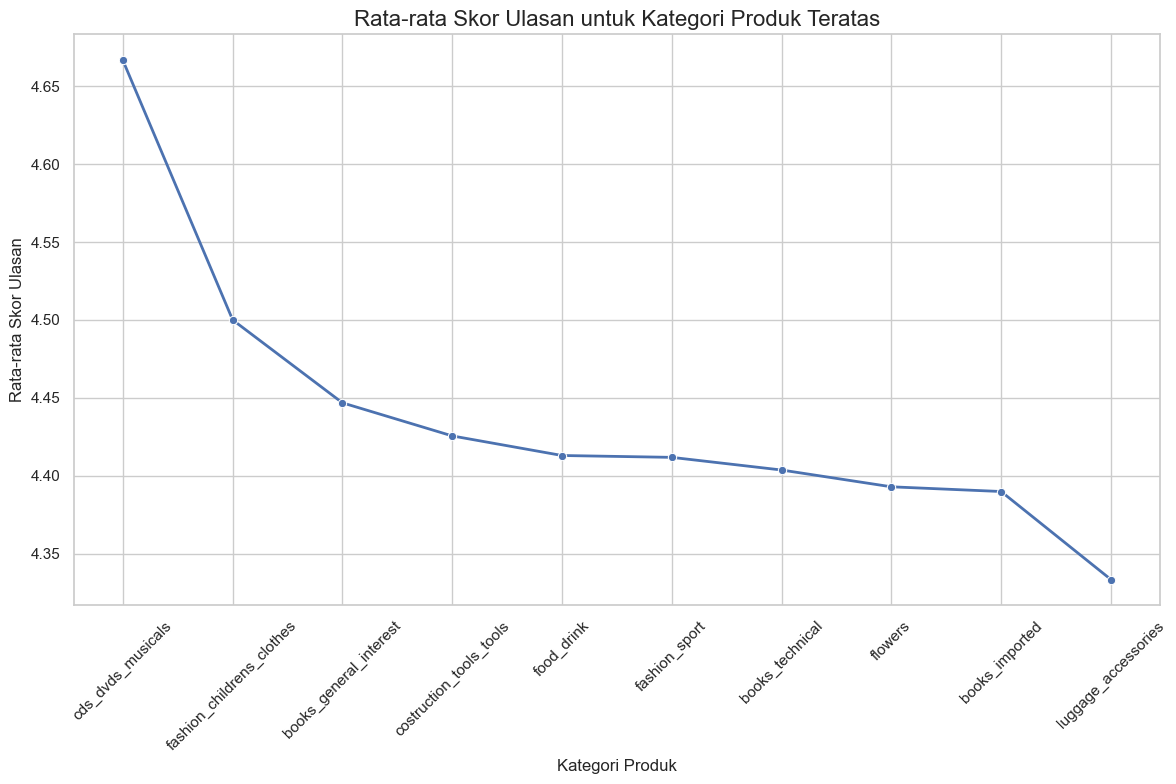

In [474]:
# Menghitung rata-rata skor ulasan untuk setiap kategori produk dan mengambil 10 teratas
mean_review_scores = merged_sales_data.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False).nlargest(10)

# Mengubah menjadi DataFrame untuk memudahkan plotting
mean_review_scores_df = mean_review_scores.reset_index()

# Mengatur tema visual Seaborn
sns.set_theme(style="whitegrid")

# Membuat diagram garis
plt.figure(figsize=(12, 8))
sns.lineplot(data=mean_review_scores_df, x="product_category_name_english", y="review_score", marker='o', color='b', linewidth=2)

# Menambahkan label dan judul
plt.title("Rata-rata Skor Ulasan untuk Kategori Produk Teratas", fontsize=16)
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Skor Ulasan")
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [476]:
mean_review_scores

product_category_name_english
cds_dvds_musicals            4.666667
fashion_childrens_clothes    4.500000
books_general_interest       4.446768
costruction_tools_tools      4.425532
food_drink                   4.412955
fashion_sport                4.411765
books_technical              4.403636
flowers                      4.392857
books_imported               4.389831
luggage_accessories          4.333333
Name: review_score, dtype: float64

**Dari data yang dihasilkan, berikut adalah penjelasan yang bisa diambil:**

1. **Kategori Produk dengan Skor Ulasan Tertinggi**:
   - `cds_dvds_musicals` memiliki rata-rata skor ulasan tertinggi yaitu 4.67. Ini menunjukkan bahwa pelanggan sangat puas dengan produk dalam kategori ini.
   - `fashion_childrens_clothes` juga memiliki skor ulasan yang sangat tinggi yaitu 4.50, menandakan kepuasan tinggi di antara pelanggan.

2. **Kategori Produk Populer dengan Skor Ulasan Tinggi**:
   - `books_general_interest`, `books_technical`, dan `books_imported` memiliki skor ulasan yang tinggi, masing-masing 4.45, 4.40, dan 4.39. Ini menunjukkan bahwa buku dalam kategori ini secara umum mendapatkan ulasan yang sangat positif.
   - `fashion_sport` dengan skor 4.41 menunjukkan bahwa produk pakaian olahraga juga sangat dihargai oleh pelanggan.

3. **Kategori Khusus dengan Skor Ulasan Tinggi**:
   - `costruction_tools_tools` dengan skor 4.43 menunjukkan bahwa alat-alat konstruksi dalam kategori ini berkinerja baik di mata pelanggan.
   - `food_drink` dengan skor 4.41 menunjukkan bahwa makanan dan minuman dalam kategori ini sangat dihargai.
   - `flowers` dengan skor 4.39 menunjukkan kepuasan pelanggan yang tinggi terhadap produk bunga.
   - `luggage_accessories` dengan skor 4.33 menunjukkan bahwa aksesoris bagasi memiliki performa yang baik di mata pelanggan.

4. **Kepuasan Pelanggan**:
   - Secara keseluruhan, skor ulasan rata-rata untuk kategori produk ini sangat tinggi, yang menandakan tingkat kepuasan pelanggan yang baik. Kategori-kategori ini mungkin memiliki kualitas produk yang baik, layanan pelanggan yang memuaskan, atau kombinasi keduanya.

5. **Fokus pada Produk Berkinerja Tinggi**:
   - Peningkatan stok atau fokus pada pemasaran untuk kategori produk dengan skor ulasan tinggi seperti `cds_dvds_musicals`, `fashion_childrens_clothes`, dan `books_general_interest` dapat membantu meningkatkan penjualan lebih lanjut karena sudah memiliki basis poks_general_interest', 
       

### Pertanyaan 5: Negara mana yang memiliki jumlah pembeli terbanyak?

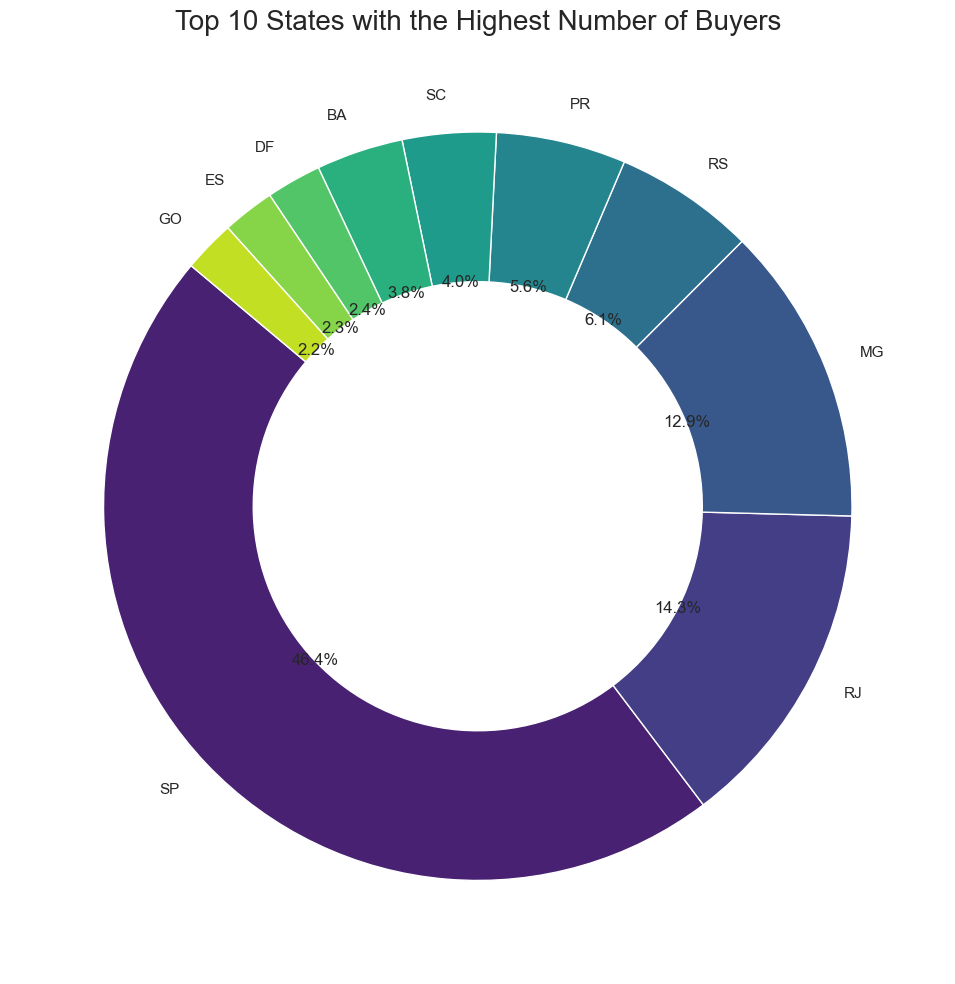

In [492]:
# Menghitung jumlah pembeli unik untuk setiap negara bagian dan mendapatkan 10 negara bagian teratas
customer_demographic = customers_df.groupby("customer_state")["customer_unique_id"].count().reset_index()
customer_demographic.columns = ["customer_state", "count"]
top_10_states = customer_demographic.sort_values(by="count", ascending=False).nlargest(10, "count")

# Membuat diagram donut
plt.figure(figsize=(10, 10))
plt.pie(top_10_states["count"], labels=top_10_states["customer_state"], colors=sns.color_palette("viridis", n_colors=10), autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))

# Menambahkan judul
plt.title("Top 10 States with the Highest Number of Buyers", fontsize=20)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [494]:
customer_demographic

,customer_state,count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


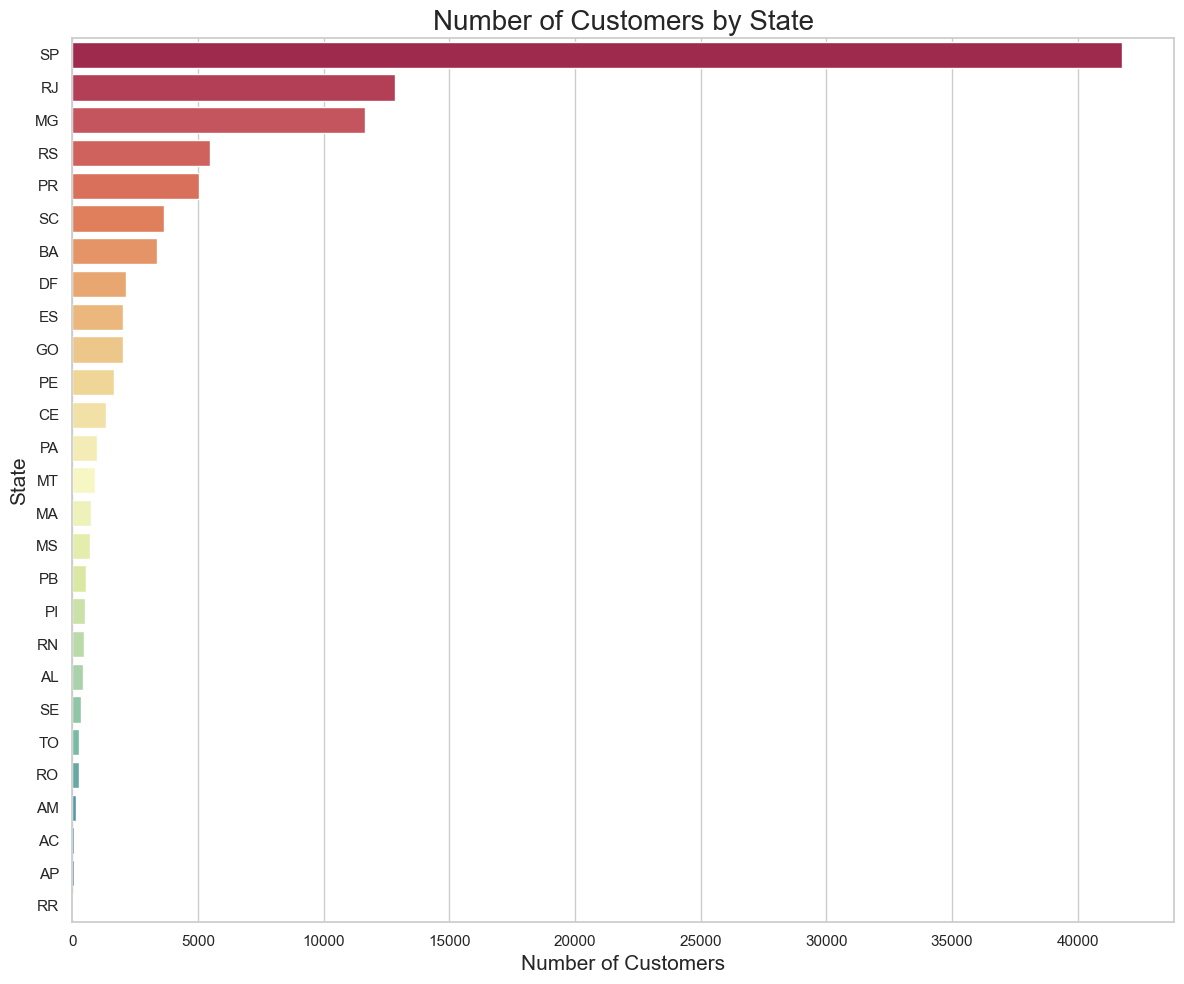

In [504]:
# Data berdasarkan data yang diberikan
data = {
    "customer_state": ["AC", "AL", "AM", "AP", "BA", "CE", "DF", "ES", "GO", "MA", "MG", "MS", "MT", "PA", "PB", "PE", "PI", "PR", "RJ", "RN", "RO", "RR", "RS", "SC", "SE", "SP", "TO"],
    "count": [81, 413, 148, 68, 3380, 1336, 2140, 2033, 2020, 747, 11635, 715, 907, 975, 536, 1652, 495, 5045, 12852, 485, 253, 46, 5466, 3637, 350, 41746, 280]
}

# Mengubah data menjadi DataFrame
customer_demographic = pd.DataFrame(data)

# Mengatur tema visual Seaborn
sns.set_theme(style="whitegrid")

# Membuat diagram batang horizontal
plt.figure(figsize=(12, 10))
sns.barplot(x="count", y="customer_state", data=customer_demographic.sort_values(by="count", ascending=False), hue="customer_state", dodge=False, palette="Spectral", legend=False)

# Menambahkan label dan judul
plt.title("Number of Customers by State", fontsize=20)
plt.xlabel("Number of Customers", fontsize=15)
plt.ylabel("State", fontsize=15)

# Menampilkan plot
plt.tight_layout()
plt.show()


Dari data ini, berikut adalah beberapa kesimpulan yang dapat diambil terkait dengan negara bagian yang memiliki jumlah pelanggan terbanyak:

1. **Negara Bagian dengan Jumlah Pelanggan Terbanyak**:
   - `SP` (São Paulo) memiliki jumlah pelanggan terbanyak dengan 41,746 pelanggan. Ini menunjukkan bahwa São Paulo adalah pasar utama dengan jumlah pelanggan yang sangat besar dibandingkan dengan negara bagian lainnya.
   - `RJ` (Rio de Janeiro) berada di posisi kedua dengan 12,852 pelanggan, juga menunjukkan bahwa ini adalah pasar besar.
   - `MG` (Minas Gerais) berada di posisi ketiga dengan 11,635 pelanggan, menandakan bahwa ini juga merupakan pasar yang signifikan.

2. **Negara Bagian dengan Jumlah Pelanggan Menengah**:
   - `PR` (Paraná) memiliki 5,045 pelanggan dan `RS` (Rio Grande do Sul) memiliki 5,466 pelanggan. Kedua negara bagian ini juga memiliki jumlah pelanggan yang cukup signifikan.
   - `BA` (Bahia) memiliki 3,380 pelanggan dan `SC` (Santa Catarina) memiliki 3,637 pelanggan, menunjukkan bahwa mereka juga merupakan pasar yang cukup besar.

3. **Negara Bagian dengan Jumlah Pelanggan Relatif Rendah**:
   - `RR` (Roraima) memiliki jumlah pelanggan terendah dengan hanya 46 pelanggan, menunjukkan bahwa pasar di daerah ini sangat kecil.
   - `AC` (Acre) dengan 81 pelanggan dan `AP` (Amapá) dengan 68 pelanggan juga menunjukkan pasar yang relatif kecil.

4. **Distribusi Pelanggan**:
   - Ada perbedaan yang signifikan dalam jumlah pelanggan di berbagai negara bagian. Beberapa negara bagian seperti São Paulo, Rio de Janeiro, dan Minas Gerais mendominasi pasar dengan jumlah pelanggan yang sangat besar.
   - Negara bagian di daerah Utara seperti Roraima, Acre, dan Amapá memiliki jumlah pelanggan yang jauh lebih rendah dibandingkan dengan negaraan diagram batang horizontal untuk memudahkan pembacaan

### RFM Analysis

RFM (Recency, Frequency, Monetary) adalah cara untuk mengelompokkan pelanggan berdasarkan seberapa sering dan seberapa banyak mereka berbelanja. Berikut penjelasannya:

1. **Recency (Kewaktuannya)**: Seberapa baru pelanggan terakhir kali membeli sesuatu. Pelanggan yang baru saja membeli memiliki nilai recency yang tinggi.

2. **Frequency (Frekuensi)**: Seberapa sering pelanggan membeli. Pelanggan yang sering membeli memiliki nilai frekuensi yang tinggi.

3. **Monetary (Moneter)**: Seberapa banyak uang yang dibelanjakan pelanggan. Pelanggan yang mengeluarkan banyak uang memiliki nilai moneter yang tinggi.

Dengan menggunakan RFM, bisnis dapat memberi nilai pada setiap pelanggan berdasarkan ketiga faktor ini. Ini membantu bisnis untuk mengelompokkan pelanggan ke dalam kategori seperti pelanggan setia, pelanggan yang perlu diperhatikan, atau pelanggan yang hampir tidak aktif, sehingga dapat menargetkan mereka dengan penawaran yang sesuai.

In [549]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106711 entries, 0 to 106710
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       106711 non-null  object         
 1   customer_id                    106711 non-null  object         
 2   order_status                   106711 non-null  object         
 3   order_purchase_timestamp       106711 non-null  datetime64[ns] 
 4   order_approved_at              106697 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   105620 non-null  datetime64[ns] 
 6   order_delivered_customer_date  106711 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  106711 non-null  datetime64[ns] 
 8   shipping_time                  104334 non-null  timedelta64[ns]
 9   shipping_duration              104334 non-null  timedelta64[ns]
 10  estimated_duration             106711 non-null  timedelt

In [559]:
# Hitung nilai total untuk setiap pesanan
all_df["total_price"] = all_df["price"] * all_df["quantity"]

# Buat DataFrame RFM dengan menghitung nilai maksimum dari timestamp pesanan, frekuensi, dan total nilai uang
rfm_df = all_df.groupby("customer_unique_id", as_index=False).agg(
    {"order_purchase_timestamp": "max",  # Ambil waktu pesanan terakhir
     "order_id": "nunique",                # Hitung jumlah pesanan unik
     "total_price": "sum"}                # Hitung total belanja
)

# Ganti nama kolom untuk kejelasan
rfm_df.columns = ["customer_unique_id", "last_order_date", "frequency", "monetary"]

# Tampilkan 5 baris pertama DataFrame
rfm_df.head(5)


,customer_unique_id,last_order_date,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00


In [563]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95420 entries, 0 to 95419
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  95420 non-null  object 
 1   last_order_date     95420 non-null  object 
 2   frequency           95420 non-null  int64  
 3   monetary            95420 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ MB


In [565]:
# Konversi kolom 'last_order_date' ke format datetime jika belum
rfm_df["last_order_date"] = pd.to_datetime(rfm_df["last_order_date"])

# Ambil tanggal terbaru dari DataFrame orders_df dan konversi ke format datetime
recent_date = pd.to_datetime(orders_df["order_purchase_timestamp"].dt.date.max())

# Hitung recency sebagai selisih hari antara tanggal terbaru dan tanggal pesanan terakhir
rfm_df["recency"] = (recent_date - rfm_df["last_order_date"]).dt.days

# Tampilkan 5 baris pertama DataFrame dengan kolom recency baru
rfm_df.head(5)

,customer_unique_id,last_order_date,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,337


In [567]:
# Hapus kolom 'last_order_date' karena tidak diperlukan lagi
rfm_df.drop("last_order_date", axis=1, inplace=True)

# Tampilkan 5 baris pertama DataFrame setelah penghapusan kolom
rfm_df.head(5)

# Tampilkan ringkasan statistik dari DataFrame 'rfm_df'
rfm_df.describe()

,frequency,monetary,recency
count,95420.000000,95420.000000,95420.000000
mean,1.034018,146.894473,287.501457
std,0.211234,243.640899,153.160850
min,1.000000,0.850000,44.000000
25%,1.000000,47.900000,163.000000
50%,1.000000,89.900000,268.000000
75%,1.000000,157.770000,397.000000
max,16.000000,13440.000000,773.000000


In [571]:
# Rencency
rfm_df.sort_values(by="recency", ascending=True).head()

,customer_unique_id,frequency,monetary,recency
95083,ff22e30958c13ffe219db7d711e8f564,2,290.00,44
65645,afbcfd0b9c5233e7ccc73428526fbb52,1,457.75,49
92476,f80013faf776e37bcea7634d59c2181e,1,65.00,49
67518,b4dcade04bc548b7e3b0243c801f8c26,1,99.00,49
1538,0421e7a23f21e5d54efed456aedbc513,1,109.90,49


In [573]:
# Frecuency
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
52597,8d50f5eadf50201ccdcedfb9e2ac8455,16,729.62,58
23302,3e43e6105506432c953e165fb2acf44c,9,1000.85,232
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,245
37532,6469f99c1f9dfae7733b25662e7f1782,7,664.20,111
75560,ca77025e7201e3b30c44b472ff346268,7,806.61,138


In [575]:
# Monetary
rfm_df.sort_values(by="monetary", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
3799,0a0a92112bd4c708ca5fde585afaa872,1,13440.00,383
41070,6ddbc64bd04d40f7768ff088d94cbeb8,2,9486.00,191
29190,4e1cce07cd5937c69dacac3c8b13d965,3,9266.60,79
71814,c0536ee7a009264e0f1bf1c8f4c54ad3,2,7830.88,327
81388,da122df9eeddfedc1dc1f5349a1a690c,2,7388.00,564


**Rencency**

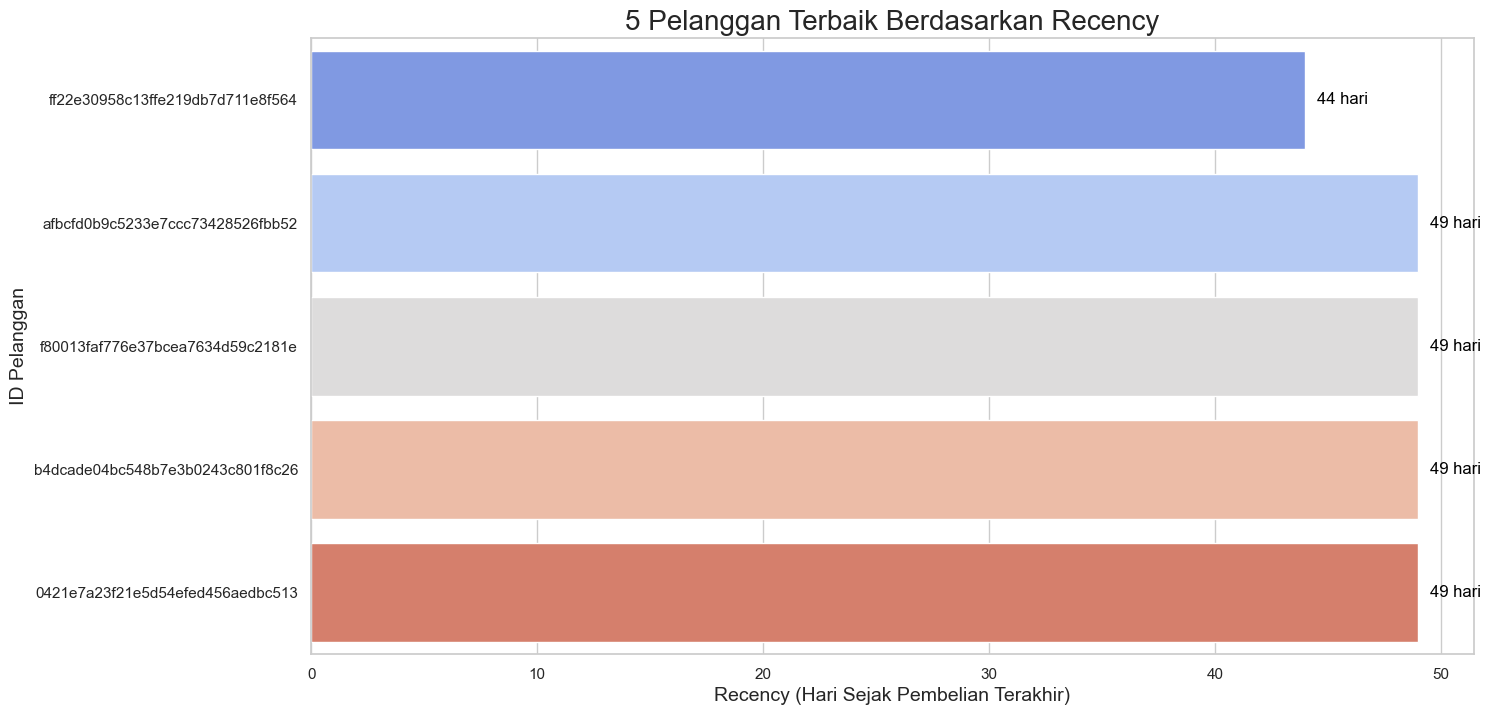

In [587]:

# Set ukuran gambar
plt.figure(figsize=(15, 8))

# Definisikan palet warna dengan jumlah warna yang sesuai (misalnya, 5 warna untuk 5 bar)
colors = sns.color_palette("coolwarm", 5)

# Urutkan dan pilih 5 pelanggan teratas dengan recency terendah
top_customers = rfm_df.sort_values(by="recency", ascending=True).head(5)

# Tambahkan kolom baru untuk hue
top_customers['color'] = top_customers['customer_unique_id']

# Buat diagram bar untuk Recency
sns.barplot(
    y="customer_unique_id",
    x="recency",
    data=top_customers,
    hue='color',  # Gunakan hue untuk warna
    palette=colors,
    dodge=False,  # Hindari pemisahan bar berdasarkan hue
    legend=False  # Hapus legend
)

# Tambahkan label dan judul
plt.title("5 Pelanggan Terbaik Berdasarkan Recency", fontsize=20)
plt.xlabel("Recency (Hari Sejak Pembelian Terakhir)", fontsize=14)
plt.ylabel("ID Pelanggan", fontsize=14)

# Anotasi bar dengan nilai recency-nya
for index, value in enumerate(top_customers["recency"]):
    plt.text(
        value + 0.5,  # Sedikit offset dari akhir bar
        index,        # Sesuaikan dengan posisi y
        f'{value} hari',  # Anotasi teks
        va='center',  # Penyesuaian vertikal
        fontsize=12,
        color='black'
    )

plt.show()


**Frequency**

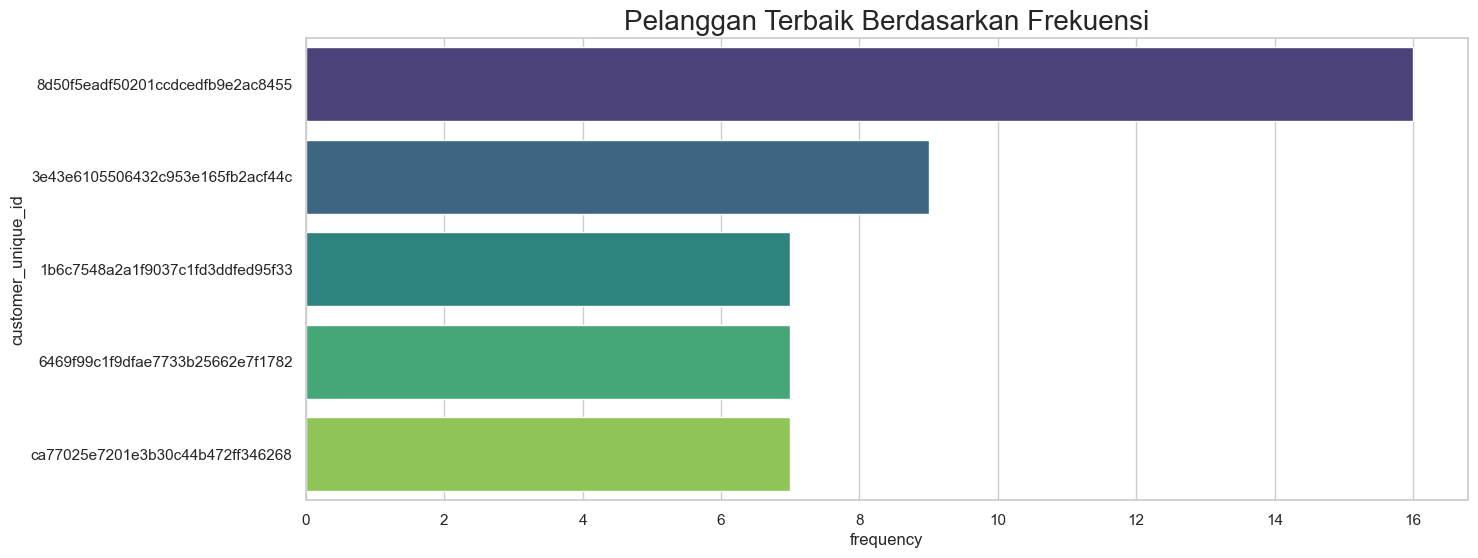

In [590]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set ukuran gambar
plt.figure(figsize=(15, 6))

# Definisikan palet warna yang menarik secara visual
colors = sns.color_palette("viridis", 5)

# Tambahkan kolom dummy untuk hue untuk menghindari peringatan di masa depan
rfm_df['color'] = rfm_df['customer_unique_id']

# Plot untuk Frekuensi dengan hue
sns.barplot(
    y="customer_unique_id",
    x="frequency",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    hue='color',  # Gunakan hue untuk menerapkan palet warna
    palette=colors,
    legend=False  # Hapus legend
)

# Tambahkan judul deskriptif
plt.title("Pelanggan Terbaik Berdasarkan Frekuensi", fontsize=20)

plt.show()


**Monetary**

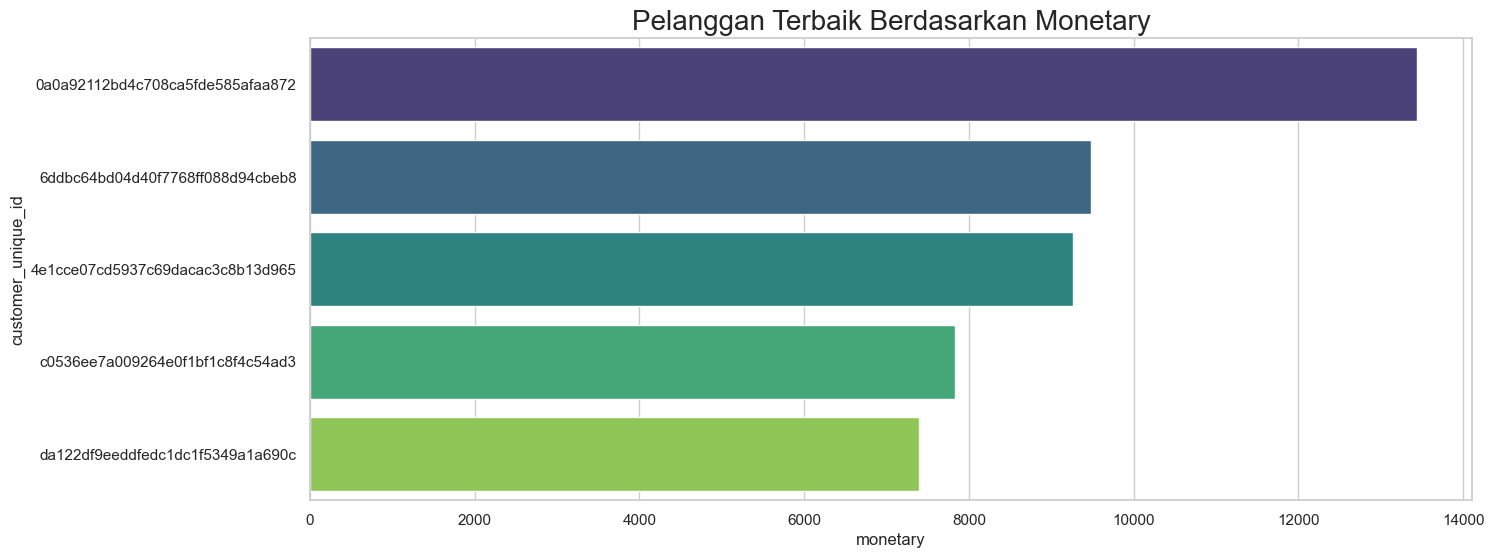

In [593]:
# Set ukuran gambar
plt.figure(figsize=(15, 6))

# Definisikan palet warna yang menarik secara visual
colors = sns.color_palette("viridis", 5)

# Tambahkan kolom dummy untuk hue agar tidak ada peringatan di masa depan
rfm_df['color'] = rfm_df['customer_unique_id']

# Plot untuk Monetary dengan hue
sns.barplot(
    y="customer_unique_id",
    x="monetary",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    hue='color',  # Gunakan hue untuk menerapkan palet warna
    palette=colors,
    legend=False  # Hapus legend
)

# Tambahkan judul deskriptif
plt.title("Pelanggan Terbaik Berdasarkan Monetary", fontsize=20)

plt.show()

In [596]:
# Hitung total pengeluaran setiap pelanggan
total_spending = rfm_df.groupby("customer_unique_id")["monetary"].sum().reset_index()

# Ubah nama kolom
total_spending.columns = ["customer_unique_id", "Spending Amount"]

# Tambahkan baris total
total_spending.loc["Total"] = total_spending["Spending Amount"].sum()

total_spending


,customer_unique_id,Spending Amount
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89
95417,ffff371b4d645b6ecea244b27531430a,89.90
95418,ffff5962728ec6157033ef9805bacc48,115.00
95419,ffffd2657e2aad2907e67c3e9daecbeb,56.99


In [598]:
# Urutkan pelanggan berdasarkan recency, frequency, dan monetary score

# Buat kolom baru yang mewakili skor recency setiap pelanggan
rfm_df["r_rank"] = rfm_df["recency"].rank(ascending=False)

# Buat kolom baru yang mewakili skor frequency setiap pelanggan
rfm_df["f_rank"] = rfm_df["frequency"].rank(ascending=True)

# Buat kolom baru yang mewakili skor monetary setiap pelanggan
rfm_df["m_rank"] = rfm_df["monetary"].rank(ascending=True)

rfm_df.head(5)


,customer_unique_id,frequency,monetary,recency,color,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,0000366f3b9a7992bf8c76cfdf3221e2,72687.0,46254.0,64245.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,0000b849f77a49e4a4ce2b2a4ca5be3f,71708.0,46254.0,4170.5
2,0000f46a3911fa3c0805444483337064,1,69.00,586,0000f46a3911fa3c0805444483337064,3427.0,46254.0,37597.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,0000f6ccb0745a6a4b88665a16c9f078,27472.5,46254.0,9564.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,0004aac84e0df4da2b147fca70cf8255,32250.5,46254.0,76446.0


In [600]:
# Normalisasi peringkat dan hapus kolom peringkat asli
for col in ["r_rank", "f_rank", "m_rank"]:
    rfm_df[f"{col}_norm"] = (rfm_df[col] / rfm_df[col].max()) * 100

# Hapus kolom peringkat asli
rfm_df.drop(["r_rank", "f_rank", "m_rank"], axis=1, inplace=True)

rfm_df.head(5)


,customer_unique_id,frequency,monetary,recency,color,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,0000366f3b9a7992bf8c76cfdf3221e2,76.175854,48.474114,67.328652
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,0000b849f77a49e4a4ce2b2a4ca5be3f,75.149864,48.474114,4.370677
2,0000f46a3911fa3c0805444483337064,1,69.00,586,0000f46a3911fa3c0805444483337064,3.591490,48.474114,39.401593
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,0000f6ccb0745a6a4b88665a16c9f078,28.791134,48.474114,10.023056
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,0004aac84e0df4da2b147fca70cf8255,33.798470,48.474114,80.115280


In [602]:
# Hitung dan skala RFM Score
rfm_df["RFM_score"] = (
    0.15 * rfm_df["r_rank_norm"]
    + 0.28 * rfm_df["f_rank_norm"]
    + 0.57 * rfm_df["m_rank_norm"]
) * 0.05

# Bulatkan RFM Score hingga 2 desimal
rfm_df["RFM_score"] = rfm_df["RFM_score"].round(2)

# Tampilkan 5 pelanggan teratas berdasarkan RFM Score
rfm_df[["customer_unique_id", "RFM_score"]].sort_values(by="RFM_score", ascending=False).head(5)


,customer_unique_id,RFM_score
58507,9cc5a07f169a1606fd347a56683e6ea6,4.99
74752,c8460e4251689ba205045f3ea17884a1,4.97
29774,4facc2e6fbc2bffab2fea92d2b4aa7e4,4.97
29190,4e1cce07cd5937c69dacac3c8b13d965,4.94
30755,525cda9909aa001ebed396f6e55eae01,4.93


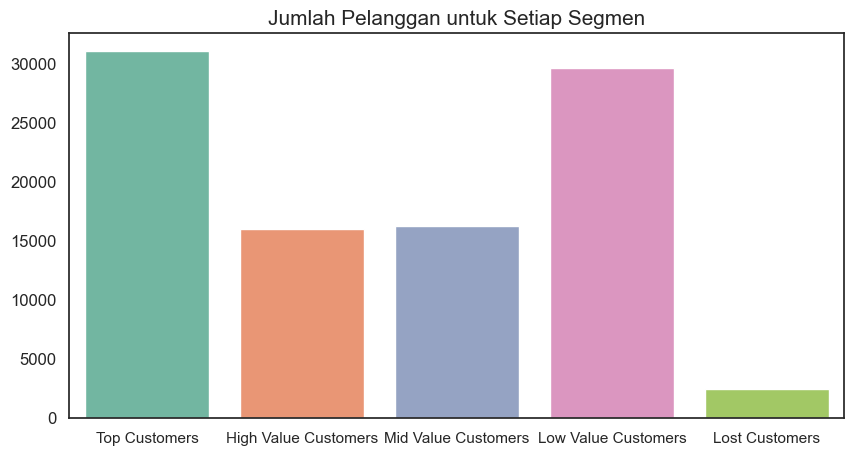

In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk memetakan skor RFM ke segmentasi pelanggan
def map_customer_segment(score):
    if score > 3:
        return "Top Customers"
    elif score > 2.5:
        return "High Value Customers"
    elif score > 2:
        return "Mid Value Customers"
    elif score > 1:
        return "Low Value Customers"
    else:
        return "Lost Customers"

# Terapkan fungsi ke kolom 'RFM_score' dan buat kolom 'customer_segment'
rfm_df["customer_segment"] = rfm_df["RFM_score"].apply(map_customer_segment)

# Hitung jumlah pelanggan unik untuk setiap segmentasi
customer_segment_df = rfm_df.groupby("customer_segment")["customer_unique_id"].nunique().reset_index()

# Ubah kolom 'customer_segment' menjadi variabel kategori dengan urutan yang sudah ditentukan
customer_segment_df["customer_segment"] = pd.Categorical(
    customer_segment_df["customer_segment"],
    categories=[
        "Top Customers",
        "High Value Customers",
        "Mid Value Customers",
        "Low Value Customers",
        "Lost Customers"
    ],
    ordered=True
)

# Atur ukuran gambar
plt.figure(figsize=(10, 5))

# Definisikan palet warna yang menarik
colors = sns.color_palette("Set2", n_colors=len(customer_segment_df))

# Atur gaya latar belakang
sns.set_style("white")

# Buat diagram batang dengan hue untuk menghindari peringatan
sns.barplot(
    x="customer_segment",
    y="customer_unique_id",
    data=customer_segment_df.sort_values(by="customer_segment"),
    hue="customer_segment",  # Tambahkan hue untuk menerapkan palet warna
    palette=colors,
    legend=False
)

# Atur judul plot
plt.title("Jumlah Pelanggan untuk Setiap Segmen", fontsize=15)

# Hapus label sumbu x dan y
plt.xlabel(None)
plt.ylabel(None)

# Atur ukuran label sumbu y
plt.tick_params(axis="y", labelsize=12)

# Tampilkan plot
plt.show()


In [612]:
customer_segment_df

,customer_segment,customer_unique_id
0,High Value Customers,16014
1,Lost Customers,2474
2,Low Value Customers,29620
3,Mid Value Customers,16262
4,Top Customers,31050


Penjelasan
-

Analisis RFM memberikan peringkat numerik kepada pelanggan dalam lima kategori berikut, di mana angka yang lebih tinggi menunjukkan hasil yang lebih baik:

1. **Top Customers** adalah pelanggan yang membeli paling baru, paling sering, dan mengeluarkan paling banyak.
2. **High Value Customers** adalah pelanggan yang membeli paling sering dan mengeluarkan paling banyak.
3. **Middle Value Customers** adalah pelanggan yang membeli paling baru dan mengeluarkan paling banyak.
4. **Low Value Customers** adalah pelanggan yang membeli paling baru, paling sering, dan mengeluarkan paling sedikit.
5. **Lost Customers** adalah pelanggan yang belum melakukan pembelian untuk waktu yang paling lama.

Berdasarkan data berikut, kita bisa menyimpulkan beberapa hal tentang distribusi pelanggan dalam berbagai segmen:

Kesimpulan:

1. **Top Customers:** 
   - Terdapat 31.050 pelanggan dalam segmen ini, yang merupakan jumlah terbanyak di antara semua segmen. Ini menunjukkan bahwa banyak pelanggan yang sangat aktif, membeli baru-baru ini, sering, dan mengeluarkan banyak uang.

2. **Low Value Customers:**
   - Segmen ini memiliki 29.620 pelanggan, yang juga merupakan angka signifikan. Pelanggan dalam kategori ini membeli baru-baru ini dan sering, tetapi mengeluarkan lebih sedikit uang dibandingkan dengan Top Customers.

3. **Mid Value Customers:**
   - Ada 16.262 pelanggan di segmen ini. Mereka membeli baru-baru ini dan mengeluarkan banyak uang, tetapi tidak seaktif Top Customers dan Low Value Customers dalam hal frekuensi pembelian.

4. **High Value Customers:**
   - Segmen ini memiliki 16.014 pelanggan. Mereka membeli paling sering dan mengeluarkan banyak uang, tetapi tidak membeli sesering atau baru-baru ini seperti pelanggan di segmen Top atau Low Value.

5. **Lost Customers:**
   - Dengan hanya 2.474 pelanggan, segmen ini memiliki jumlah pelanggan terendah. Ini menunjukkan bahwa relatif sedikit pelanggan yang belum melakukan pembelian untuk waktu yang lama.

Analisis:

- **Pelanggan Terbaik (Top Customers)** dan **Pelanggan Bernilai Rendah (Low Value Customers)** memiliki jumlah pelanggan yang signifikan, yang menunjukkan bahwa ada banyak pelanggan yang aktif dan sering melakukan pembelian, tetapi dengan pengeluaran yang bervariasi.
  
- **Pelanggan Bernilai Menengah (Mid Value Customers)** dan **Pelanggan Bernilai Tinggi (High Value Customers)** memiliki jumlah yang lebih kecil dibandingkan dengan dua segmen aktif lainnya, tetapi mereka menunjukkan nilai tinggi dalam hal pengeluaran.

- **Pelanggan Hilang (Lost Customers)** memiliki jumlah yang paling sedikit, menunjukkan bahwa hanya sebagian kecil dari pelanggan yang belum melakukan pembelian untuk waktu yang lama. 


## Conclusion

**Pertanyaan 1: Jenis Pembayaran apa yang paling sering digunakan?**
- **Kartu kredit** adalah metode pembayaran yang paling banyak digunakan dan juga memiliki nilai rata-rata pembayaran tertinggi.
- **Boleto** adalah metode pembayaran yang banyak digunakan tetapi dengan nilai rata-rata pembayaran yang lebih rendah.
- **Voucher** dan **kartu debit** kurang populer dan memiliki nilai rata-rata pembayaran yang lebih rendah.
- Data dengan **`not_defined`** mungkin menunjukkan adanya masalah atau kekurangan dalam pendataan.

Informasi ini bisa membantu dalam menentukan strategi pembayaran dan promosi yang lebih baik sesuai dengan preferensi dan pola pembayaran pelanggan.

----

**Pertanyaan 2: Kapan terjadi penjualan yang terbanyak?**
- Penjualan tertinggi terjadi pada bulan Agustus 2018, dengan jumlah order 7823. Ini menunjukkan bahwa bulan tersebut adalah periode dengan aktivitas penjualan yang sangat tinggi dibandingkan bulan-bulan lainnya.

----

**Pertanyaan 3: Produk apa yang paling banyak terjual?**
- Kategori Bed_Bath_Table memiliki jumlah produk terbanyak dengan product_id sebesar 11105.

----

**Pertanyaan 4: Produk apa yang memiliki performance yang baik berdasarkan rating reviews?**
- Dalam analisis skor ulasan produk, beberapa kategori menunjukkan kinerja yang sangat baik dalam hal kepuasan pelanggan. Di antara kategori produk dengan skor ulasan tertinggi, `cds_dvds_musicals` memimpin dengan rata-rata skor 4.67, menandakan tingkat kepuasan pelanggan yang sangat tinggi. Kategori ini menonjol sebagai yang paling memuaskan bagi konsumen, diikuti oleh `fashion_childrens_clothes` dengan skor 4.50, yang juga menunjukkan kepuasan pelanggan yang signifikan.

- Kategori produk lain yang menunjukkan skor ulasan tinggi meliputi buku dengan `books_general_interest` (4.45), `books_technical` (4.40), dan `books_imported` (4.39). Ulasan positif yang konsisten di kategori buku ini mengindikasikan bahwa konsumen memiliki pengalaman yang sangat baik dengan produk-produk dalam kategori ini. Selain itu, kategori `fashion_sport` dengan skor 4.41 juga menunjukkan kepuasan pelanggan yang tinggi, menandakan bahwa produk pakaian olahraga dihargai oleh konsumen.

- Kategori produk khusus seperti `costruction_tools_tools` (4.43), `food_drink` (4.41), `flowers` (4.39), dan `luggage_accessories` (4.33) juga mendapatkan ulasan positif. Ini menunjukkan bahwa produk-produk dalam kategori tersebut memenuhi harapan pelanggan dan memperoleh penilaian yang baik.

Secara keseluruhan, tingkat kepuasan pelanggan yang tinggi ini mengindikasikan bahwa produk-produk dalam kategori-kategori tersebut mungkin memiliki kualitas yang sangat baik atau layanan pelanggan yang memuaskan. Oleh karena itu, untuk memanfaatkan kepuasan pelanggan yang sudah ada, perusahaan dapat fokus pada peningkatan stok atau strategi pemasaran untuk kategori-kategori produk dengan skor ulasan tinggi seperti `cds_dvds_musicals`, `fashion_childrens_clothes`, dan `books_general_interest`. Ini tidak hanya dapat meningkatkan penjualan tetapi juga memperkuat loyalitas pelanggan yang sudah ada.h ada.

----

**Pertanyaan 5: Negara bagian (States) mana yang memiliki jumlah pembeli terbanyak?**

- SP (São Paulo) memiliki jumlah pelanggan terbanyak dengan 41,746 pelanggan. Ini menunjukkan bahwa São Paulo adalah pasar utama dengan jumlah pelanggan yang sangat besar dibandingkan dengan negara bagian lainnya.

## Save `all_df` ke `csv`

In [620]:
rfm_df.drop(["r_rank_norm", "f_rank_norm", "m_rank_norm"], axis=1, inplace=True)
rfm_df.head(5)

,customer_unique_id,frequency,monetary,recency,color,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,0000366f3b9a7992bf8c76cfdf3221e2,3.17,Top Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,0000b849f77a49e4a4ce2b2a4ca5be3f,1.37,Low Value Customers
2,0000f46a3911fa3c0805444483337064,1,69.00,586,0000f46a3911fa3c0805444483337064,1.83,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,0000f6ccb0745a6a4b88665a16c9f078,1.18,Low Value Customers
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,0004aac84e0df4da2b147fca70cf8255,3.22,Top Customers


In [622]:
all_df = all_df.merge(rfm_df, on="customer_unique_id", how="left")

In [624]:
all_df.to_csv("all_data.csv", index=False)